# Overview

This notebook shows various ways of calculationg the error. The simples form is the absolute devaition for the aanlytical surface. For cases where a reference surface isn't available, the statistical error is calculated in various ways.

The notebook will be structured as follows:

 - On the fly error in 1D
 - On the fly error in 2D
 - On the fly error 1D with block averaging
 - On the fly error 1D with Bootstraping
 - Plumed fes calculations with block averaging

Some functions are taken from the Functions.ipynb file. Please refere to previous notebooks for more information.

In [1]:
# #Import modules like numpy and matplotlib as well as functions defined in Functions.ipynb
# os.chdir(path)
%run Functions.ipynb

# Define the path to this notebook
path = os.getcwd()

#make sure to run this cell in the right directory!!
print("The path to this notebook is:", path)

ModuleNotFoundError: No module named 'nbformat'

In [9]:
#create new directory for simulation foles named "/Error"

os.chdir(path)
try: os.mkdir(path + "/Error")
except: print("folder \"Error\" already exists")
os.chdir(path + "/Error")

folder "Error" already exists


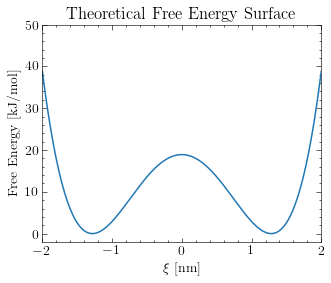

In [11]:
# Define and plot theoretical free energy surface
nbins = 201    
min_x = -2         
max_x = 2            
x = np.linspace(min_x,max_x,nbins)
y = 7*grid**4 - 23*x**2
y = y - min(y)

plt.plot(x,y)
plt.xlim(-2,2)
plt.ylim(-2,50)
plt.xlabel("$\\xi$ [nm]")
plt.ylabel("Free Energy [kJ/mol]")
plt.title("Theoretical Free Energy Surface")
plt.show()

# AD and AAD

The AD (absulute devaition) and the AAD (average absolute devaition) is a very simple way of finding the error, but requires a referece surface, which often ist't availbale.

$AD_j = \frac{1}{n}\sum_{i=0}^{n} \| x_{ref,j} - x_{i,j} \|$

$AAD = \frac{1}{n_{bins}} \frac{1}{n}\sum_{j=1}^{n_{bins}} \sum_{i=1}^{n} \| x_{ref,j} - x_{i,j} \|$

Where $n$ is the number of samples, $n_{bins}$ the number of grid values, while $i$ and $j$ are their respective indexes.


In [26]:
def absolute_error(fes):
    AD = abs(y - fes)
    AAD = sum(AD)/nbins
    return [AD, AAD]

# On the fly Error in 1D

To understand the calculation of the "on the fly error", one should recall that the fundmental calculated quantity is the mean force, which is calculated using a weighted average approach:

$\Big\langle \frac{dF_t(x)}{dx} \Big\rangle_t = \frac{\sum_t p_t^b(x) \frac{dF_t(x)}{dx}}{\sum_t p_t^b(x)}$

where $\Big\langle \frac{dF_t(x)}{dx} \Big\rangle_t$ is the wieghted average (mean force), $p_t^b(x)$ are the sample weights and $\frac{dF_t(x)}{dx}$ the sample (mean force).

In order to find the variance of a weighted sum, the weighted variance is used:

$\sigma^2 = \frac{\sum_{i=1}^n w_i (x_i - \overline{x})^2}{\sum_{i=1}^n w_i} \frac{n}{n-1}$

where $\overline{x}$ is the weighted average, $w_i$ are the sample weights, $x_i$ is the sample and the term $\frac{n}{n-1}$ correspons to the bessel correction. To use the equation above, one first needs to know the final average, which implies that all mean forces need to be calculated first to find the variance and more data means that the calculations of the sums need to be repeated. Instead, the equation above is rearranged to:

$\sigma^2 = \Big( \frac{\sum_{i=1}^n w_i x_i}{\sum_{i=1}^n w_i} - (\overline{x})^2 \Big) \frac{n}{n-1}$

Which allows for the calculation of most terms in an on the fly fashion.

The standard deviation is calculated using: $\sigma = \sqrt{\frac{\sigma^2}{n}}$. For weighted varainces, $n$ is defined as $n = \frac{(\sum_{i=1}^n w_i)^2}{\sum_{i=1}^n (w_i^2)}$.

This way of writing the variance becomes much easier to compute, because there are a couple of sums that need to be determined, many of them are determined for the mean force calculation anyways. If at any given point, one wants to know the variance, one just needs to add and multiply some existing vectors without the need of extensive loops or conditions.

Reference: Bevington, P.R., Data Reduction and Error Analysis for the Physical Sciences, McGraw-Hill, 1969.

#### Lets start by running a simulations on the analytical surface:

(Long simulation needed to see good convergence, but short simulation enough to make concept clear)

In [110]:
run_langevin1D(int(1E8), sigma=0.1, height=5, biasfactor=10)

PLUMED: PLUMED is starting
PLUMED: Version: 2.6.1 (git: 3a15987) compiled on Dec  2 2020 at 14:49:14
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /home/antoniu/.local/lib/plumed
PLUMED: For installed feature, see /home/antoniu/.local/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: pesmd
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 2
PLUMED: File suffix: 
PLUMED: FILE: plumed.dat
PLUMED: Action DISTANCE
PLUMED:   with label p
PLUMED:   between atoms 1 2
PLUMED:   using periodic boundary conditions
PLUMED:   added component to this action:  p.x 
PLUMED:   added component to this action:  p.y 
PLUMED:   added component to this action:  p.z 
PLUMED:   WARNING: components will not have the proper periodicity - see manual
PLUMED: Action MATHEVAL
PLUMED:   with label ff
PL

Doing step 6700
Doing step 6720
Doing step 6740
Doing step 6760
Doing step 6780
Doing step 6800
Doing step 6820
Doing step 6840
Doing step 6860
Doing step 6880
Doing step 6900
Doing step 6920
Doing step 6940
Doing step 6960
Doing step 6980
Doing step 7000
Doing step 7020
Doing step 7040
Doing step 7060
Doing step 7080
Doing step 7100
Doing step 7120
Doing step 7140
Doing step 7160
Doing step 7180
Doing step 7200
Doing step 7220
Doing step 7240
Doing step 7260
Doing step 7280
Doing step 7300
Doing step 7320
Doing step 7340
Doing step 7360
Doing step 7380
Doing step 7400
Doing step 7420
Doing step 7440
Doing step 7460
Doing step 7480
Doing step 7500
Doing step 7520
Doing step 7540
Doing step 7560
Doing step 7580
Doing step 7600
Doing step 7620
Doing step 7640
Doing step 7660
Doing step 7680
Doing step 7700
Doing step 7720
Doing step 7740
Doing step 7760
Doing step 7780
Doing step 7800
Doing step 7820
Doing step 7840
Doing step 7860
Doing step 7880
Doing step 7900
Doing step 7920
Doing st

Doing step 18260
Doing step 18280
Doing step 18300
Doing step 18320
Doing step 18340
Doing step 18360
Doing step 18380
Doing step 18400
Doing step 18420
Doing step 18440
Doing step 18460
Doing step 18480
Doing step 18500
Doing step 18520
Doing step 18540
Doing step 18560
Doing step 18580
Doing step 18600
Doing step 18620
Doing step 18640
Doing step 18660
Doing step 18680
Doing step 18700
Doing step 18720
Doing step 18740
Doing step 18760
Doing step 18780
Doing step 18800
Doing step 18820
Doing step 18840
Doing step 18860
Doing step 18880
Doing step 18900
Doing step 18920
Doing step 18940
Doing step 18960
Doing step 18980
Doing step 19000
Doing step 19020
Doing step 19040
Doing step 19060
Doing step 19080
Doing step 19100
Doing step 19120
Doing step 19140
Doing step 19160
Doing step 19180
Doing step 19200
Doing step 19220
Doing step 19240
Doing step 19260
Doing step 19280
Doing step 19300
Doing step 19320
Doing step 19340
Doing step 19360
Doing step 19380
Doing step 19400
Doing step 194

Doing step 30400
Doing step 30420
Doing step 30440
Doing step 30460
Doing step 30480
Doing step 30500
Doing step 30520
Doing step 30540
Doing step 30560
Doing step 30580
Doing step 30600
Doing step 30620
Doing step 30640
Doing step 30660
Doing step 30680
Doing step 30700
Doing step 30720
Doing step 30740
Doing step 30760
Doing step 30780
Doing step 30800
Doing step 30820
Doing step 30840
Doing step 30860
Doing step 30880
Doing step 30900
Doing step 30920
Doing step 30940
Doing step 30960
Doing step 30980
Doing step 31000
Doing step 31020
Doing step 31040
Doing step 31060
Doing step 31080
Doing step 31100
Doing step 31120
Doing step 31140
Doing step 31160
Doing step 31180
Doing step 31200
Doing step 31220
Doing step 31240
Doing step 31260
Doing step 31280
Doing step 31300
Doing step 31320
Doing step 31340
Doing step 31360
Doing step 31380
Doing step 31400
Doing step 31420
Doing step 31440
Doing step 31460
Doing step 31480
Doing step 31500
Doing step 31520
Doing step 31540
Doing step 315

Doing step 40580
Doing step 40600
Doing step 40620
Doing step 40640
Doing step 40660
Doing step 40680
Doing step 40700
Doing step 40720
Doing step 40740
Doing step 40760
Doing step 40780
Doing step 40800
Doing step 40820
Doing step 40840
Doing step 40860
Doing step 40880
Doing step 40900
Doing step 40920
Doing step 40940
Doing step 40960
Doing step 40980
Doing step 41000
Doing step 41020
Doing step 41040
Doing step 41060
Doing step 41080
Doing step 41100
Doing step 41120
Doing step 41140
Doing step 41160
Doing step 41180
Doing step 41200
Doing step 41220
Doing step 41240
Doing step 41260
Doing step 41280
Doing step 41300
Doing step 41320
Doing step 41340
Doing step 41360
Doing step 41380
Doing step 41400
Doing step 41420
Doing step 41440
Doing step 41460
Doing step 41480
Doing step 41500
Doing step 41520
Doing step 41540
Doing step 41560
Doing step 41580
Doing step 41600
Doing step 41620
Doing step 41640
Doing step 41660
Doing step 41680
Doing step 41700
Doing step 41720
Doing step 417

Doing step 50320
Doing step 50340
Doing step 50360
Doing step 50380
Doing step 50400
Doing step 50420
Doing step 50440
Doing step 50460
Doing step 50480
Doing step 50500
Doing step 50520
Doing step 50540
Doing step 50560
Doing step 50580
Doing step 50600
Doing step 50620
Doing step 50640
Doing step 50660
Doing step 50680
Doing step 50700
Doing step 50720
Doing step 50740
Doing step 50760
Doing step 50780
Doing step 50800
Doing step 50820
Doing step 50840
Doing step 50860
Doing step 50880
Doing step 50900
Doing step 50920
Doing step 50940
Doing step 50960
Doing step 50980
Doing step 51000
Doing step 51020
Doing step 51040
Doing step 51060
Doing step 51080
Doing step 51100
Doing step 51120
Doing step 51140
Doing step 51160
Doing step 51180
Doing step 51200
Doing step 51220
Doing step 51240
Doing step 51260
Doing step 51280
Doing step 51300
Doing step 51320
Doing step 51340
Doing step 51360
Doing step 51380
Doing step 51400
Doing step 51420
Doing step 51440
Doing step 51460
Doing step 514

Doing step 59980
Doing step 60000
Doing step 60020
Doing step 60040
Doing step 60060
Doing step 60080
Doing step 60100
Doing step 60120
Doing step 60140
Doing step 60160
Doing step 60180
Doing step 60200
Doing step 60220
Doing step 60240
Doing step 60260
Doing step 60280
Doing step 60300
Doing step 60320
Doing step 60340
Doing step 60360
Doing step 60380
Doing step 60400
Doing step 60420
Doing step 60440
Doing step 60460
Doing step 60480
Doing step 60500
Doing step 60520
Doing step 60540
Doing step 60560
Doing step 60580
Doing step 60600
Doing step 60620
Doing step 60640
Doing step 60660
Doing step 60680
Doing step 60700
Doing step 60720
Doing step 60740
Doing step 60760
Doing step 60780
Doing step 60800
Doing step 60820
Doing step 60840
Doing step 60860
Doing step 60880
Doing step 60900
Doing step 60920
Doing step 60940
Doing step 60960
Doing step 60980
Doing step 61000
Doing step 61020
Doing step 61040
Doing step 61060
Doing step 61080
Doing step 61100
Doing step 61120
Doing step 611

Doing step 69960
Doing step 69980
Doing step 70000
Doing step 70020
Doing step 70040
Doing step 70060
Doing step 70080
Doing step 70100
Doing step 70120
Doing step 70140
Doing step 70160
Doing step 70180
Doing step 70200
Doing step 70220
Doing step 70240
Doing step 70260
Doing step 70280
Doing step 70300
Doing step 70320
Doing step 70340
Doing step 70360
Doing step 70380
Doing step 70400
Doing step 70420
Doing step 70440
Doing step 70460
Doing step 70480
Doing step 70500
Doing step 70520
Doing step 70540
Doing step 70560
Doing step 70580
Doing step 70600
Doing step 70620
Doing step 70640
Doing step 70660
Doing step 70680
Doing step 70700
Doing step 70720
Doing step 70740
Doing step 70760
Doing step 70780
Doing step 70800
Doing step 70820
Doing step 70840
Doing step 70860
Doing step 70880
Doing step 70900
Doing step 70920
Doing step 70940
Doing step 70960
Doing step 70980
Doing step 71000
Doing step 71020
Doing step 71040
Doing step 71060
Doing step 71080
Doing step 71100
Doing step 711

Doing step 81800
Doing step 81820
Doing step 81840
Doing step 81860
Doing step 81880
Doing step 81900
Doing step 81920
Doing step 81940
Doing step 81960
Doing step 81980
Doing step 82000
Doing step 82020
Doing step 82040
Doing step 82060
Doing step 82080
Doing step 82100
Doing step 82120
Doing step 82140
Doing step 82160
Doing step 82180
Doing step 82200
Doing step 82220
Doing step 82240
Doing step 82260
Doing step 82280
Doing step 82300
Doing step 82320
Doing step 82340
Doing step 82360
Doing step 82380
Doing step 82400
Doing step 82420
Doing step 82440
Doing step 82460
Doing step 82480
Doing step 82500
Doing step 82520
Doing step 82540
Doing step 82560
Doing step 82580
Doing step 82600
Doing step 82620
Doing step 82640
Doing step 82660
Doing step 82680
Doing step 82700
Doing step 82720
Doing step 82740
Doing step 82760
Doing step 82780
Doing step 82800
Doing step 82820
Doing step 82840
Doing step 82860
Doing step 82880
Doing step 82900
Doing step 82920
Doing step 82940
Doing step 829

Doing step 93460
Doing step 93480
Doing step 93500
Doing step 93520
Doing step 93540
Doing step 93560
Doing step 93580
Doing step 93600
Doing step 93620
Doing step 93640
Doing step 93660
Doing step 93680
Doing step 93700
Doing step 93720
Doing step 93740
Doing step 93760
Doing step 93780
Doing step 93800
Doing step 93820
Doing step 93840
Doing step 93860
Doing step 93880
Doing step 93900
Doing step 93920
Doing step 93940
Doing step 93960
Doing step 93980
Doing step 94000
Doing step 94020
Doing step 94040
Doing step 94060
Doing step 94080
Doing step 94100
Doing step 94120
Doing step 94140
Doing step 94160
Doing step 94180
Doing step 94200
Doing step 94220
Doing step 94240
Doing step 94260
Doing step 94280
Doing step 94300
Doing step 94320
Doing step 94340
Doing step 94360
Doing step 94380
Doing step 94400
Doing step 94420
Doing step 94440
Doing step 94460
Doing step 94480
Doing step 94500
Doing step 94520
Doing step 94540
Doing step 94560
Doing step 94580
Doing step 94600
Doing step 946

Doing step 104900
Doing step 104920
Doing step 104940
Doing step 104960
Doing step 104980
Doing step 105000
Doing step 105020
Doing step 105040
Doing step 105060
Doing step 105080
Doing step 105100
Doing step 105120
Doing step 105140
Doing step 105160
Doing step 105180
Doing step 105200
Doing step 105220
Doing step 105240
Doing step 105260
Doing step 105280
Doing step 105300
Doing step 105320
Doing step 105340
Doing step 105360
Doing step 105380
Doing step 105400
Doing step 105420
Doing step 105440
Doing step 105460
Doing step 105480
Doing step 105500
Doing step 105520
Doing step 105540
Doing step 105560
Doing step 105580
Doing step 105600
Doing step 105620
Doing step 105640
Doing step 105660
Doing step 105680
Doing step 105700
Doing step 105720
Doing step 105740
Doing step 105760
Doing step 105780
Doing step 105800
Doing step 105820
Doing step 105840
Doing step 105860
Doing step 105880
Doing step 105900
Doing step 105920
Doing step 105940
Doing step 105960
Doing step 105980
Doing step

Doing step 114160
Doing step 114180
Doing step 114200
Doing step 114220
Doing step 114240
Doing step 114260
Doing step 114280
Doing step 114300
Doing step 114320
Doing step 114340
Doing step 114360
Doing step 114380
Doing step 114400
Doing step 114420
Doing step 114440
Doing step 114460
Doing step 114480
Doing step 114500
Doing step 114520
Doing step 114540
Doing step 114560
Doing step 114580
Doing step 114600
Doing step 114620
Doing step 114640
Doing step 114660
Doing step 114680
Doing step 114700
Doing step 114720
Doing step 114740
Doing step 114760
Doing step 114780
Doing step 114800
Doing step 114820
Doing step 114840
Doing step 114860
Doing step 114880
Doing step 114900
Doing step 114920
Doing step 114940
Doing step 114960
Doing step 114980
Doing step 115000
Doing step 115020
Doing step 115040
Doing step 115060
Doing step 115080
Doing step 115100
Doing step 115120
Doing step 115140
Doing step 115160
Doing step 115180
Doing step 115200
Doing step 115220
Doing step 115240
Doing step

Doing step 123720
Doing step 123740
Doing step 123760
Doing step 123780
Doing step 123800
Doing step 123820
Doing step 123840
Doing step 123860
Doing step 123880
Doing step 123900
Doing step 123920
Doing step 123940
Doing step 123960
Doing step 123980
Doing step 124000
Doing step 124020
Doing step 124040
Doing step 124060
Doing step 124080
Doing step 124100
Doing step 124120
Doing step 124140
Doing step 124160
Doing step 124180
Doing step 124200
Doing step 124220
Doing step 124240
Doing step 124260
Doing step 124280
Doing step 124300
Doing step 124320
Doing step 124340
Doing step 124360
Doing step 124380
Doing step 124400
Doing step 124420
Doing step 124440
Doing step 124460
Doing step 124480
Doing step 124500
Doing step 124520
Doing step 124540
Doing step 124560
Doing step 124580
Doing step 124600
Doing step 124620
Doing step 124640
Doing step 124660
Doing step 124680
Doing step 124700
Doing step 124720
Doing step 124740
Doing step 124760
Doing step 124780
Doing step 124800
Doing step

Doing step 135020
Doing step 135040
Doing step 135060
Doing step 135080
Doing step 135100
Doing step 135120
Doing step 135140
Doing step 135160
Doing step 135180
Doing step 135200
Doing step 135220
Doing step 135240
Doing step 135260
Doing step 135280
Doing step 135300
Doing step 135320
Doing step 135340
Doing step 135360
Doing step 135380
Doing step 135400
Doing step 135420
Doing step 135440
Doing step 135460
Doing step 135480
Doing step 135500
Doing step 135520
Doing step 135540
Doing step 135560
Doing step 135580
Doing step 135600
Doing step 135620
Doing step 135640
Doing step 135660
Doing step 135680
Doing step 135700
Doing step 135720
Doing step 135740
Doing step 135760
Doing step 135780
Doing step 135800
Doing step 135820
Doing step 135840
Doing step 135860
Doing step 135880
Doing step 135900
Doing step 135920
Doing step 135940
Doing step 135960
Doing step 135980
Doing step 136000
Doing step 136020
Doing step 136040
Doing step 136060
Doing step 136080
Doing step 136100
Doing step

Doing step 145120
Doing step 145140
Doing step 145160
Doing step 145180
Doing step 145200
Doing step 145220
Doing step 145240
Doing step 145260
Doing step 145280
Doing step 145300
Doing step 145320
Doing step 145340
Doing step 145360
Doing step 145380
Doing step 145400
Doing step 145420
Doing step 145440
Doing step 145460
Doing step 145480
Doing step 145500
Doing step 145520
Doing step 145540
Doing step 145560
Doing step 145580
Doing step 145600
Doing step 145620
Doing step 145640
Doing step 145660
Doing step 145680
Doing step 145700
Doing step 145720
Doing step 145740
Doing step 145760
Doing step 145780
Doing step 145800
Doing step 145820
Doing step 145840
Doing step 145860
Doing step 145880
Doing step 145900
Doing step 145920
Doing step 145940
Doing step 145960
Doing step 145980
Doing step 146000
Doing step 146020
Doing step 146040
Doing step 146060
Doing step 146080
Doing step 146100
Doing step 146120
Doing step 146140
Doing step 146160
Doing step 146180
Doing step 146200
Doing step

Doing step 155000
Doing step 155020
Doing step 155040
Doing step 155060
Doing step 155080
Doing step 155100
Doing step 155120
Doing step 155140
Doing step 155160
Doing step 155180
Doing step 155200
Doing step 155220
Doing step 155240
Doing step 155260
Doing step 155280
Doing step 155300
Doing step 155320
Doing step 155340
Doing step 155360
Doing step 155380
Doing step 155400
Doing step 155420
Doing step 155440
Doing step 155460
Doing step 155480
Doing step 155500
Doing step 155520
Doing step 155540
Doing step 155560
Doing step 155580
Doing step 155600
Doing step 155620
Doing step 155640
Doing step 155660
Doing step 155680
Doing step 155700
Doing step 155720
Doing step 155740
Doing step 155760
Doing step 155780
Doing step 155800
Doing step 155820
Doing step 155840
Doing step 155860
Doing step 155880
Doing step 155900
Doing step 155920
Doing step 155940
Doing step 155960
Doing step 155980
Doing step 156000
Doing step 156020
Doing step 156040
Doing step 156060
Doing step 156080
Doing step

Doing step 164280
Doing step 164300
Doing step 164320
Doing step 164340
Doing step 164360
Doing step 164380
Doing step 164400
Doing step 164420
Doing step 164440
Doing step 164460
Doing step 164480
Doing step 164500
Doing step 164520
Doing step 164540
Doing step 164560
Doing step 164580
Doing step 164600
Doing step 164620
Doing step 164640
Doing step 164660
Doing step 164680
Doing step 164700
Doing step 164720
Doing step 164740
Doing step 164760
Doing step 164780
Doing step 164800
Doing step 164820
Doing step 164840
Doing step 164860
Doing step 164880
Doing step 164900
Doing step 164920
Doing step 164940
Doing step 164960
Doing step 164980
Doing step 165000
Doing step 165020
Doing step 165040
Doing step 165060
Doing step 165080
Doing step 165100
Doing step 165120
Doing step 165140
Doing step 165160
Doing step 165180
Doing step 165200
Doing step 165220
Doing step 165240
Doing step 165260
Doing step 165280
Doing step 165300
Doing step 165320
Doing step 165340
Doing step 165360
Doing step

Doing step 175540
Doing step 175560
Doing step 175580
Doing step 175600
Doing step 175620
Doing step 175640
Doing step 175660
Doing step 175680
Doing step 175700
Doing step 175720
Doing step 175740
Doing step 175760
Doing step 175780
Doing step 175800
Doing step 175820
Doing step 175840
Doing step 175860
Doing step 175880
Doing step 175900
Doing step 175920
Doing step 175940
Doing step 175960
Doing step 175980
Doing step 176000
Doing step 176020
Doing step 176040
Doing step 176060
Doing step 176080
Doing step 176100
Doing step 176120
Doing step 176140
Doing step 176160
Doing step 176180
Doing step 176200
Doing step 176220
Doing step 176240
Doing step 176260
Doing step 176280
Doing step 176300
Doing step 176320
Doing step 176340
Doing step 176360
Doing step 176380
Doing step 176400
Doing step 176420
Doing step 176440
Doing step 176460
Doing step 176480
Doing step 176500
Doing step 176520
Doing step 176540
Doing step 176560
Doing step 176580
Doing step 176600
Doing step 176620
Doing step

Doing step 185420
Doing step 185440
Doing step 185460
Doing step 185480
Doing step 185500
Doing step 185520
Doing step 185540
Doing step 185560
Doing step 185580
Doing step 185600
Doing step 185620
Doing step 185640
Doing step 185660
Doing step 185680
Doing step 185700
Doing step 185720
Doing step 185740
Doing step 185760
Doing step 185780
Doing step 185800
Doing step 185820
Doing step 185840
Doing step 185860
Doing step 185880
Doing step 185900
Doing step 185920
Doing step 185940
Doing step 185960
Doing step 185980
Doing step 186000
Doing step 186020
Doing step 186040
Doing step 186060
Doing step 186080
Doing step 186100
Doing step 186120
Doing step 186140
Doing step 186160
Doing step 186180
Doing step 186200
Doing step 186220
Doing step 186240
Doing step 186260
Doing step 186280
Doing step 186300
Doing step 186320
Doing step 186340
Doing step 186360
Doing step 186380
Doing step 186400
Doing step 186420
Doing step 186440
Doing step 186460
Doing step 186480
Doing step 186500
Doing step

Doing step 196720
Doing step 196740
Doing step 196760
Doing step 196780
Doing step 196800
Doing step 196820
Doing step 196840
Doing step 196860
Doing step 196880
Doing step 196900
Doing step 196920
Doing step 196940
Doing step 196960
Doing step 196980
Doing step 197000
Doing step 197020
Doing step 197040
Doing step 197060
Doing step 197080
Doing step 197100
Doing step 197120
Doing step 197140
Doing step 197160
Doing step 197180
Doing step 197200
Doing step 197220
Doing step 197240
Doing step 197260
Doing step 197280
Doing step 197300
Doing step 197320
Doing step 197340
Doing step 197360
Doing step 197380
Doing step 197400
Doing step 197420
Doing step 197440
Doing step 197460
Doing step 197480
Doing step 197500
Doing step 197520
Doing step 197540
Doing step 197560
Doing step 197580
Doing step 197600
Doing step 197620
Doing step 197640
Doing step 197660
Doing step 197680
Doing step 197700
Doing step 197720
Doing step 197740
Doing step 197760
Doing step 197780
Doing step 197800
Doing step

Doing step 206300
Doing step 206320
Doing step 206340
Doing step 206360
Doing step 206380
Doing step 206400
Doing step 206420
Doing step 206440
Doing step 206460
Doing step 206480
Doing step 206500
Doing step 206520
Doing step 206540
Doing step 206560
Doing step 206580
Doing step 206600
Doing step 206620
Doing step 206640
Doing step 206660
Doing step 206680
Doing step 206700
Doing step 206720
Doing step 206740
Doing step 206760
Doing step 206780
Doing step 206800
Doing step 206820
Doing step 206840
Doing step 206860
Doing step 206880
Doing step 206900
Doing step 206920
Doing step 206940
Doing step 206960
Doing step 206980
Doing step 207000
Doing step 207020
Doing step 207040
Doing step 207060
Doing step 207080
Doing step 207100
Doing step 207120
Doing step 207140
Doing step 207160
Doing step 207180
Doing step 207200
Doing step 207220
Doing step 207240
Doing step 207260
Doing step 207280
Doing step 207300
Doing step 207320
Doing step 207340
Doing step 207360
Doing step 207380
Doing step

Doing step 216560
Doing step 216580
Doing step 216600
Doing step 216620
Doing step 216640
Doing step 216660
Doing step 216680
Doing step 216700
Doing step 216720
Doing step 216740
Doing step 216760
Doing step 216780
Doing step 216800
Doing step 216820
Doing step 216840
Doing step 216860
Doing step 216880
Doing step 216900
Doing step 216920
Doing step 216940
Doing step 216960
Doing step 216980
Doing step 217000
Doing step 217020
Doing step 217040
Doing step 217060
Doing step 217080
Doing step 217100
Doing step 217120
Doing step 217140
Doing step 217160
Doing step 217180
Doing step 217200
Doing step 217220
Doing step 217240
Doing step 217260
Doing step 217280
Doing step 217300
Doing step 217320
Doing step 217340
Doing step 217360
Doing step 217380
Doing step 217400
Doing step 217420
Doing step 217440
Doing step 217460
Doing step 217480
Doing step 217500
Doing step 217520
Doing step 217540
Doing step 217560
Doing step 217580
Doing step 217600
Doing step 217620
Doing step 217640
Doing step

Doing step 226240
Doing step 226260
Doing step 226280
Doing step 226300
Doing step 226320
Doing step 226340
Doing step 226360
Doing step 226380
Doing step 226400
Doing step 226420
Doing step 226440
Doing step 226460
Doing step 226480
Doing step 226500
Doing step 226520
Doing step 226540
Doing step 226560
Doing step 226580
Doing step 226600
Doing step 226620
Doing step 226640
Doing step 226660
Doing step 226680
Doing step 226700
Doing step 226720
Doing step 226740
Doing step 226760
Doing step 226780
Doing step 226800
Doing step 226820
Doing step 226840
Doing step 226860
Doing step 226880
Doing step 226900
Doing step 226920
Doing step 226940
Doing step 226960
Doing step 226980
Doing step 227000
Doing step 227020
Doing step 227040
Doing step 227060
Doing step 227080
Doing step 227100
Doing step 227120
Doing step 227140
Doing step 227160
Doing step 227180
Doing step 227200
Doing step 227220
Doing step 227240
Doing step 227260
Doing step 227280
Doing step 227300
Doing step 227320
Doing step

Doing step 235900
Doing step 235920
Doing step 235940
Doing step 235960
Doing step 235980
Doing step 236000
Doing step 236020
Doing step 236040
Doing step 236060
Doing step 236080
Doing step 236100
Doing step 236120
Doing step 236140
Doing step 236160
Doing step 236180
Doing step 236200
Doing step 236220
Doing step 236240
Doing step 236260
Doing step 236280
Doing step 236300
Doing step 236320
Doing step 236340
Doing step 236360
Doing step 236380
Doing step 236400
Doing step 236420
Doing step 236440
Doing step 236460
Doing step 236480
Doing step 236500
Doing step 236520
Doing step 236540
Doing step 236560
Doing step 236580
Doing step 236600
Doing step 236620
Doing step 236640
Doing step 236660
Doing step 236680
Doing step 236700
Doing step 236720
Doing step 236740
Doing step 236760
Doing step 236780
Doing step 236800
Doing step 236820
Doing step 236840
Doing step 236860
Doing step 236880
Doing step 236900
Doing step 236920
Doing step 236940
Doing step 236960
Doing step 236980
Doing step

Doing step 245760
Doing step 245780
Doing step 245800
Doing step 245820
Doing step 245840
Doing step 245860
Doing step 245880
Doing step 245900
Doing step 245920
Doing step 245940
Doing step 245960
Doing step 245980
Doing step 246000
Doing step 246020
Doing step 246040
Doing step 246060
Doing step 246080
Doing step 246100
Doing step 246120
Doing step 246140
Doing step 246160
Doing step 246180
Doing step 246200
Doing step 246220
Doing step 246240
Doing step 246260
Doing step 246280
Doing step 246300
Doing step 246320
Doing step 246340
Doing step 246360
Doing step 246380
Doing step 246400
Doing step 246420
Doing step 246440
Doing step 246460
Doing step 246480
Doing step 246500
Doing step 246520
Doing step 246540
Doing step 246560
Doing step 246580
Doing step 246600
Doing step 246620
Doing step 246640
Doing step 246660
Doing step 246680
Doing step 246700
Doing step 246720
Doing step 246740
Doing step 246760
Doing step 246780
Doing step 246800
Doing step 246820
Doing step 246840
Doing step

Doing step 255240
Doing step 255260
Doing step 255280
Doing step 255300
Doing step 255320
Doing step 255340
Doing step 255360
Doing step 255380
Doing step 255400
Doing step 255420
Doing step 255440
Doing step 255460
Doing step 255480
Doing step 255500
Doing step 255520
Doing step 255540
Doing step 255560
Doing step 255580
Doing step 255600
Doing step 255620
Doing step 255640
Doing step 255660
Doing step 255680
Doing step 255700
Doing step 255720
Doing step 255740
Doing step 255760
Doing step 255780
Doing step 255800
Doing step 255820
Doing step 255840
Doing step 255860
Doing step 255880
Doing step 255900
Doing step 255920
Doing step 255940
Doing step 255960
Doing step 255980
Doing step 256000
Doing step 256020
Doing step 256040
Doing step 256060
Doing step 256080
Doing step 256100
Doing step 256120
Doing step 256140
Doing step 256160
Doing step 256180
Doing step 256200
Doing step 256220
Doing step 256240
Doing step 256260
Doing step 256280
Doing step 256300
Doing step 256320
Doing step

Doing step 264980
Doing step 265000
Doing step 265020
Doing step 265040
Doing step 265060
Doing step 265080
Doing step 265100
Doing step 265120
Doing step 265140
Doing step 265160
Doing step 265180
Doing step 265200
Doing step 265220
Doing step 265240
Doing step 265260
Doing step 265280
Doing step 265300
Doing step 265320
Doing step 265340
Doing step 265360
Doing step 265380
Doing step 265400
Doing step 265420
Doing step 265440
Doing step 265460
Doing step 265480
Doing step 265500
Doing step 265520
Doing step 265540
Doing step 265560
Doing step 265580
Doing step 265600
Doing step 265620
Doing step 265640
Doing step 265660
Doing step 265680
Doing step 265700
Doing step 265720
Doing step 265740
Doing step 265760
Doing step 265780
Doing step 265800
Doing step 265820
Doing step 265840
Doing step 265860
Doing step 265880
Doing step 265900
Doing step 265920
Doing step 265940
Doing step 265960
Doing step 265980
Doing step 266000
Doing step 266020
Doing step 266040
Doing step 266060
Doing step

Doing step 274720
Doing step 274740
Doing step 274760
Doing step 274780
Doing step 274800
Doing step 274820
Doing step 274840
Doing step 274860
Doing step 274880
Doing step 274900
Doing step 274920
Doing step 274940
Doing step 274960
Doing step 274980
Doing step 275000
Doing step 275020
Doing step 275040
Doing step 275060
Doing step 275080
Doing step 275100
Doing step 275120
Doing step 275140
Doing step 275160
Doing step 275180
Doing step 275200
Doing step 275220
Doing step 275240
Doing step 275260
Doing step 275280
Doing step 275300
Doing step 275320
Doing step 275340
Doing step 275360
Doing step 275380
Doing step 275400
Doing step 275420
Doing step 275440
Doing step 275460
Doing step 275480
Doing step 275500
Doing step 275520
Doing step 275540
Doing step 275560
Doing step 275580
Doing step 275600
Doing step 275620
Doing step 275640
Doing step 275660
Doing step 275680
Doing step 275700
Doing step 275720
Doing step 275740
Doing step 275760
Doing step 275780
Doing step 275800
Doing step

Doing step 284840
Doing step 284860
Doing step 284880
Doing step 284900
Doing step 284920
Doing step 284940
Doing step 284960
Doing step 284980
Doing step 285000
Doing step 285020
Doing step 285040
Doing step 285060
Doing step 285080
Doing step 285100
Doing step 285120
Doing step 285140
Doing step 285160
Doing step 285180
Doing step 285200
Doing step 285220
Doing step 285240
Doing step 285260
Doing step 285280
Doing step 285300
Doing step 285320
Doing step 285340
Doing step 285360
Doing step 285380
Doing step 285400
Doing step 285420
Doing step 285440
Doing step 285460
Doing step 285480
Doing step 285500
Doing step 285520
Doing step 285540
Doing step 285560
Doing step 285580
Doing step 285600
Doing step 285620
Doing step 285640
Doing step 285660
Doing step 285680
Doing step 285700
Doing step 285720
Doing step 285740
Doing step 285760
Doing step 285780
Doing step 285800
Doing step 285820
Doing step 285840
Doing step 285860
Doing step 285880
Doing step 285900
Doing step 285920
Doing step

Doing step 295100
Doing step 295120
Doing step 295140
Doing step 295160
Doing step 295180
Doing step 295200
Doing step 295220
Doing step 295240
Doing step 295260
Doing step 295280
Doing step 295300
Doing step 295320
Doing step 295340
Doing step 295360
Doing step 295380
Doing step 295400
Doing step 295420
Doing step 295440
Doing step 295460
Doing step 295480
Doing step 295500
Doing step 295520
Doing step 295540
Doing step 295560
Doing step 295580
Doing step 295600
Doing step 295620
Doing step 295640
Doing step 295660
Doing step 295680
Doing step 295700
Doing step 295720
Doing step 295740
Doing step 295760
Doing step 295780
Doing step 295800
Doing step 295820
Doing step 295840
Doing step 295860
Doing step 295880
Doing step 295900
Doing step 295920
Doing step 295940
Doing step 295960
Doing step 295980
Doing step 296000
Doing step 296020
Doing step 296040
Doing step 296060
Doing step 296080
Doing step 296100
Doing step 296120
Doing step 296140
Doing step 296160
Doing step 296180
Doing step

Doing step 304660
Doing step 304680
Doing step 304700
Doing step 304720
Doing step 304740
Doing step 304760
Doing step 304780
Doing step 304800
Doing step 304820
Doing step 304840
Doing step 304860
Doing step 304880
Doing step 304900
Doing step 304920
Doing step 304940
Doing step 304960
Doing step 304980
Doing step 305000
Doing step 305020
Doing step 305040
Doing step 305060
Doing step 305080
Doing step 305100
Doing step 305120
Doing step 305140
Doing step 305160
Doing step 305180
Doing step 305200
Doing step 305220
Doing step 305240
Doing step 305260
Doing step 305280
Doing step 305300
Doing step 305320
Doing step 305340
Doing step 305360
Doing step 305380
Doing step 305400
Doing step 305420
Doing step 305440
Doing step 305460
Doing step 305480
Doing step 305500
Doing step 305520
Doing step 305540
Doing step 305560
Doing step 305580
Doing step 305600
Doing step 305620
Doing step 305640
Doing step 305660
Doing step 305680
Doing step 305700
Doing step 305720
Doing step 305740
Doing step

Doing step 314220
Doing step 314240
Doing step 314260
Doing step 314280
Doing step 314300
Doing step 314320
Doing step 314340
Doing step 314360
Doing step 314380
Doing step 314400
Doing step 314420
Doing step 314440
Doing step 314460
Doing step 314480
Doing step 314500
Doing step 314520
Doing step 314540
Doing step 314560
Doing step 314580
Doing step 314600
Doing step 314620
Doing step 314640
Doing step 314660
Doing step 314680
Doing step 314700
Doing step 314720
Doing step 314740
Doing step 314760
Doing step 314780
Doing step 314800
Doing step 314820
Doing step 314840
Doing step 314860
Doing step 314880
Doing step 314900
Doing step 314920
Doing step 314940
Doing step 314960
Doing step 314980
Doing step 315000
Doing step 315020
Doing step 315040
Doing step 315060
Doing step 315080
Doing step 315100
Doing step 315120
Doing step 315140
Doing step 315160
Doing step 315180
Doing step 315200
Doing step 315220
Doing step 315240
Doing step 315260
Doing step 315280
Doing step 315300
Doing step

Doing step 323660
Doing step 323680
Doing step 323700
Doing step 323720
Doing step 323740
Doing step 323760
Doing step 323780
Doing step 323800
Doing step 323820
Doing step 323840
Doing step 323860
Doing step 323880
Doing step 323900
Doing step 323920
Doing step 323940
Doing step 323960
Doing step 323980
Doing step 324000
Doing step 324020
Doing step 324040
Doing step 324060
Doing step 324080
Doing step 324100
Doing step 324120
Doing step 324140
Doing step 324160
Doing step 324180
Doing step 324200
Doing step 324220
Doing step 324240
Doing step 324260
Doing step 324280
Doing step 324300
Doing step 324320
Doing step 324340
Doing step 324360
Doing step 324380
Doing step 324400
Doing step 324420
Doing step 324440
Doing step 324460
Doing step 324480
Doing step 324500
Doing step 324520
Doing step 324540
Doing step 324560
Doing step 324580
Doing step 324600
Doing step 324620
Doing step 324640
Doing step 324660
Doing step 324680
Doing step 324700
Doing step 324720
Doing step 324740
Doing step

Doing step 333100
Doing step 333120
Doing step 333140
Doing step 333160
Doing step 333180
Doing step 333200
Doing step 333220
Doing step 333240
Doing step 333260
Doing step 333280
Doing step 333300
Doing step 333320
Doing step 333340
Doing step 333360
Doing step 333380
Doing step 333400
Doing step 333420
Doing step 333440
Doing step 333460
Doing step 333480
Doing step 333500
Doing step 333520
Doing step 333540
Doing step 333560
Doing step 333580
Doing step 333600
Doing step 333620
Doing step 333640
Doing step 333660
Doing step 333680
Doing step 333700
Doing step 333720
Doing step 333740
Doing step 333760
Doing step 333780
Doing step 333800
Doing step 333820
Doing step 333840
Doing step 333860
Doing step 333880
Doing step 333900
Doing step 333920
Doing step 333940
Doing step 333960
Doing step 333980
Doing step 334000
Doing step 334020
Doing step 334040
Doing step 334060
Doing step 334080
Doing step 334100
Doing step 334120
Doing step 334140
Doing step 334160
Doing step 334180
Doing step

Doing step 342480
Doing step 342500
Doing step 342520
Doing step 342540
Doing step 342560
Doing step 342580
Doing step 342600
Doing step 342620
Doing step 342640
Doing step 342660
Doing step 342680
Doing step 342700
Doing step 342720
Doing step 342740
Doing step 342760
Doing step 342780
Doing step 342800
Doing step 342820
Doing step 342840
Doing step 342860
Doing step 342880
Doing step 342900
Doing step 342920
Doing step 342940
Doing step 342960
Doing step 342980
Doing step 343000
Doing step 343020
Doing step 343040
Doing step 343060
Doing step 343080
Doing step 343100
Doing step 343120
Doing step 343140
Doing step 343160
Doing step 343180
Doing step 343200
Doing step 343220
Doing step 343240
Doing step 343260
Doing step 343280
Doing step 343300
Doing step 343320
Doing step 343340
Doing step 343360
Doing step 343380
Doing step 343400
Doing step 343420
Doing step 343440
Doing step 343460
Doing step 343480
Doing step 343500
Doing step 343520
Doing step 343540
Doing step 343560
Doing step

Doing step 352260
Doing step 352280
Doing step 352300
Doing step 352320
Doing step 352340
Doing step 352360
Doing step 352380
Doing step 352400
Doing step 352420
Doing step 352440
Doing step 352460
Doing step 352480
Doing step 352500
Doing step 352520
Doing step 352540
Doing step 352560
Doing step 352580
Doing step 352600
Doing step 352620
Doing step 352640
Doing step 352660
Doing step 352680
Doing step 352700
Doing step 352720
Doing step 352740
Doing step 352760
Doing step 352780
Doing step 352800
Doing step 352820
Doing step 352840
Doing step 352860
Doing step 352880
Doing step 352900
Doing step 352920
Doing step 352940
Doing step 352960
Doing step 352980
Doing step 353000
Doing step 353020
Doing step 353040
Doing step 353060
Doing step 353080
Doing step 353100
Doing step 353120
Doing step 353140
Doing step 353160
Doing step 353180
Doing step 353200
Doing step 353220
Doing step 353240
Doing step 353260
Doing step 353280
Doing step 353300
Doing step 353320
Doing step 353340
Doing step

Doing step 361420
Doing step 361440
Doing step 361460
Doing step 361480
Doing step 361500
Doing step 361520
Doing step 361540
Doing step 361560
Doing step 361580
Doing step 361600
Doing step 361620
Doing step 361640
Doing step 361660
Doing step 361680
Doing step 361700
Doing step 361720
Doing step 361740
Doing step 361760
Doing step 361780
Doing step 361800
Doing step 361820
Doing step 361840
Doing step 361860
Doing step 361880
Doing step 361900
Doing step 361920
Doing step 361940
Doing step 361960
Doing step 361980
Doing step 362000
Doing step 362020
Doing step 362040
Doing step 362060
Doing step 362080
Doing step 362100
Doing step 362120
Doing step 362140
Doing step 362160
Doing step 362180
Doing step 362200
Doing step 362220
Doing step 362240
Doing step 362260
Doing step 362280
Doing step 362300
Doing step 362320
Doing step 362340
Doing step 362360
Doing step 362380
Doing step 362400
Doing step 362420
Doing step 362440
Doing step 362460
Doing step 362480
Doing step 362500
Doing step

Doing step 371580
Doing step 371600
Doing step 371620
Doing step 371640
Doing step 371660
Doing step 371680
Doing step 371700
Doing step 371720
Doing step 371740
Doing step 371760
Doing step 371780
Doing step 371800
Doing step 371820
Doing step 371840
Doing step 371860
Doing step 371880
Doing step 371900
Doing step 371920
Doing step 371940
Doing step 371960
Doing step 371980
Doing step 372000
Doing step 372020
Doing step 372040
Doing step 372060
Doing step 372080
Doing step 372100
Doing step 372120
Doing step 372140
Doing step 372160
Doing step 372180
Doing step 372200
Doing step 372220
Doing step 372240
Doing step 372260
Doing step 372280
Doing step 372300
Doing step 372320
Doing step 372340
Doing step 372360
Doing step 372380
Doing step 372400
Doing step 372420
Doing step 372440
Doing step 372460
Doing step 372480
Doing step 372500
Doing step 372520
Doing step 372540
Doing step 372560
Doing step 372580
Doing step 372600
Doing step 372620
Doing step 372640
Doing step 372660
Doing step

Doing step 380980
Doing step 381000
Doing step 381020
Doing step 381040
Doing step 381060
Doing step 381080
Doing step 381100
Doing step 381120
Doing step 381140
Doing step 381160
Doing step 381180
Doing step 381200
Doing step 381220
Doing step 381240
Doing step 381260
Doing step 381280
Doing step 381300
Doing step 381320
Doing step 381340
Doing step 381360
Doing step 381380
Doing step 381400
Doing step 381420
Doing step 381440
Doing step 381460
Doing step 381480
Doing step 381500
Doing step 381520
Doing step 381540
Doing step 381560
Doing step 381580
Doing step 381600
Doing step 381620
Doing step 381640
Doing step 381660
Doing step 381680
Doing step 381700
Doing step 381720
Doing step 381740
Doing step 381760
Doing step 381780
Doing step 381800
Doing step 381820
Doing step 381840
Doing step 381860
Doing step 381880
Doing step 381900
Doing step 381920
Doing step 381940
Doing step 381960
Doing step 381980
Doing step 382000
Doing step 382020
Doing step 382040
Doing step 382060
Doing step

Doing step 390640
Doing step 390660
Doing step 390680
Doing step 390700
Doing step 390720
Doing step 390740
Doing step 390760
Doing step 390780
Doing step 390800
Doing step 390820
Doing step 390840
Doing step 390860
Doing step 390880
Doing step 390900
Doing step 390920
Doing step 390940
Doing step 390960
Doing step 390980
Doing step 391000
Doing step 391020
Doing step 391040
Doing step 391060
Doing step 391080
Doing step 391100
Doing step 391120
Doing step 391140
Doing step 391160
Doing step 391180
Doing step 391200
Doing step 391220
Doing step 391240
Doing step 391260
Doing step 391280
Doing step 391300
Doing step 391320
Doing step 391340
Doing step 391360
Doing step 391380
Doing step 391400
Doing step 391420
Doing step 391440
Doing step 391460
Doing step 391480
Doing step 391500
Doing step 391520
Doing step 391540
Doing step 391560
Doing step 391580
Doing step 391600
Doing step 391620
Doing step 391640
Doing step 391660
Doing step 391680
Doing step 391700
Doing step 391720
Doing step

Doing step 400200
Doing step 400220
Doing step 400240
Doing step 400260
Doing step 400280
Doing step 400300
Doing step 400320
Doing step 400340
Doing step 400360
Doing step 400380
Doing step 400400
Doing step 400420
Doing step 400440
Doing step 400460
Doing step 400480
Doing step 400500
Doing step 400520
Doing step 400540
Doing step 400560
Doing step 400580
Doing step 400600
Doing step 400620
Doing step 400640
Doing step 400660
Doing step 400680
Doing step 400700
Doing step 400720
Doing step 400740
Doing step 400760
Doing step 400780
Doing step 400800
Doing step 400820
Doing step 400840
Doing step 400860
Doing step 400880
Doing step 400900
Doing step 400920
Doing step 400940
Doing step 400960
Doing step 400980
Doing step 401000
Doing step 401020
Doing step 401040
Doing step 401060
Doing step 401080
Doing step 401100
Doing step 401120
Doing step 401140
Doing step 401160
Doing step 401180
Doing step 401200
Doing step 401220
Doing step 401240
Doing step 401260
Doing step 401280
Doing step

Doing step 409880
Doing step 409900
Doing step 409920
Doing step 409940
Doing step 409960
Doing step 409980
Doing step 410000
Doing step 410020
Doing step 410040
Doing step 410060
Doing step 410080
Doing step 410100
Doing step 410120
Doing step 410140
Doing step 410160
Doing step 410180
Doing step 410200
Doing step 410220
Doing step 410240
Doing step 410260
Doing step 410280
Doing step 410300
Doing step 410320
Doing step 410340
Doing step 410360
Doing step 410380
Doing step 410400
Doing step 410420
Doing step 410440
Doing step 410460
Doing step 410480
Doing step 410500
Doing step 410520
Doing step 410540
Doing step 410560
Doing step 410580
Doing step 410600
Doing step 410620
Doing step 410640
Doing step 410660
Doing step 410680
Doing step 410700
Doing step 410720
Doing step 410740
Doing step 410760
Doing step 410780
Doing step 410800
Doing step 410820
Doing step 410840
Doing step 410860
Doing step 410880
Doing step 410900
Doing step 410920
Doing step 410940
Doing step 410960
Doing step

Doing step 419300
Doing step 419320
Doing step 419340
Doing step 419360
Doing step 419380
Doing step 419400
Doing step 419420
Doing step 419440
Doing step 419460
Doing step 419480
Doing step 419500
Doing step 419520
Doing step 419540
Doing step 419560
Doing step 419580
Doing step 419600
Doing step 419620
Doing step 419640
Doing step 419660
Doing step 419680
Doing step 419700
Doing step 419720
Doing step 419740
Doing step 419760
Doing step 419780
Doing step 419800
Doing step 419820
Doing step 419840
Doing step 419860
Doing step 419880
Doing step 419900
Doing step 419920
Doing step 419940
Doing step 419960
Doing step 419980
Doing step 420000
Doing step 420020
Doing step 420040
Doing step 420060
Doing step 420080
Doing step 420100
Doing step 420120
Doing step 420140
Doing step 420160
Doing step 420180
Doing step 420200
Doing step 420220
Doing step 420240
Doing step 420260
Doing step 420280
Doing step 420300
Doing step 420320
Doing step 420340
Doing step 420360
Doing step 420380
Doing step

Doing step 428800
Doing step 428820
Doing step 428840
Doing step 428860
Doing step 428880
Doing step 428900
Doing step 428920
Doing step 428940
Doing step 428960
Doing step 428980
Doing step 429000
Doing step 429020
Doing step 429040
Doing step 429060
Doing step 429080
Doing step 429100
Doing step 429120
Doing step 429140
Doing step 429160
Doing step 429180
Doing step 429200
Doing step 429220
Doing step 429240
Doing step 429260
Doing step 429280
Doing step 429300
Doing step 429320
Doing step 429340
Doing step 429360
Doing step 429380
Doing step 429400
Doing step 429420
Doing step 429440
Doing step 429460
Doing step 429480
Doing step 429500
Doing step 429520
Doing step 429540
Doing step 429560
Doing step 429580
Doing step 429600
Doing step 429620
Doing step 429640
Doing step 429660
Doing step 429680
Doing step 429700
Doing step 429720
Doing step 429740
Doing step 429760
Doing step 429780
Doing step 429800
Doing step 429820
Doing step 429840
Doing step 429860
Doing step 429880
Doing step

Doing step 437960
Doing step 437980
Doing step 438000
Doing step 438020
Doing step 438040
Doing step 438060
Doing step 438080
Doing step 438100
Doing step 438120
Doing step 438140
Doing step 438160
Doing step 438180
Doing step 438200
Doing step 438220
Doing step 438240
Doing step 438260
Doing step 438280
Doing step 438300
Doing step 438320
Doing step 438340
Doing step 438360
Doing step 438380
Doing step 438400
Doing step 438420
Doing step 438440
Doing step 438460
Doing step 438480
Doing step 438500
Doing step 438520
Doing step 438540
Doing step 438560
Doing step 438580
Doing step 438600
Doing step 438620
Doing step 438640
Doing step 438660
Doing step 438680
Doing step 438700
Doing step 438720
Doing step 438740
Doing step 438760
Doing step 438780
Doing step 438800
Doing step 438820
Doing step 438840
Doing step 438860
Doing step 438880
Doing step 438900
Doing step 438920
Doing step 438940
Doing step 438960
Doing step 438980
Doing step 439000
Doing step 439020
Doing step 439040
Doing step

Doing step 447580
Doing step 447600
Doing step 447620
Doing step 447640
Doing step 447660
Doing step 447680
Doing step 447700
Doing step 447720
Doing step 447740
Doing step 447760
Doing step 447780
Doing step 447800
Doing step 447820
Doing step 447840
Doing step 447860
Doing step 447880
Doing step 447900
Doing step 447920
Doing step 447940
Doing step 447960
Doing step 447980
Doing step 448000
Doing step 448020
Doing step 448040
Doing step 448060
Doing step 448080
Doing step 448100
Doing step 448120
Doing step 448140
Doing step 448160
Doing step 448180
Doing step 448200
Doing step 448220
Doing step 448240
Doing step 448260
Doing step 448280
Doing step 448300
Doing step 448320
Doing step 448340
Doing step 448360
Doing step 448380
Doing step 448400
Doing step 448420
Doing step 448440
Doing step 448460
Doing step 448480
Doing step 448500
Doing step 448520
Doing step 448540
Doing step 448560
Doing step 448580
Doing step 448600
Doing step 448620
Doing step 448640
Doing step 448660
Doing step

Doing step 457500
Doing step 457520
Doing step 457540
Doing step 457560
Doing step 457580
Doing step 457600
Doing step 457620
Doing step 457640
Doing step 457660
Doing step 457680
Doing step 457700
Doing step 457720
Doing step 457740
Doing step 457760
Doing step 457780
Doing step 457800
Doing step 457820
Doing step 457840
Doing step 457860
Doing step 457880
Doing step 457900
Doing step 457920
Doing step 457940
Doing step 457960
Doing step 457980
Doing step 458000
Doing step 458020
Doing step 458040
Doing step 458060
Doing step 458080
Doing step 458100
Doing step 458120
Doing step 458140
Doing step 458160
Doing step 458180
Doing step 458200
Doing step 458220
Doing step 458240
Doing step 458260
Doing step 458280
Doing step 458300
Doing step 458320
Doing step 458340
Doing step 458360
Doing step 458380
Doing step 458400
Doing step 458420
Doing step 458440
Doing step 458460
Doing step 458480
Doing step 458500
Doing step 458520
Doing step 458540
Doing step 458560
Doing step 458580
Doing step

Doing step 466780
Doing step 466800
Doing step 466820
Doing step 466840
Doing step 466860
Doing step 466880
Doing step 466900
Doing step 466920
Doing step 466940
Doing step 466960
Doing step 466980
Doing step 467000
Doing step 467020
Doing step 467040
Doing step 467060
Doing step 467080
Doing step 467100
Doing step 467120
Doing step 467140
Doing step 467160
Doing step 467180
Doing step 467200
Doing step 467220
Doing step 467240
Doing step 467260
Doing step 467280
Doing step 467300
Doing step 467320
Doing step 467340
Doing step 467360
Doing step 467380
Doing step 467400
Doing step 467420
Doing step 467440
Doing step 467460
Doing step 467480
Doing step 467500
Doing step 467520
Doing step 467540
Doing step 467560
Doing step 467580
Doing step 467600
Doing step 467620
Doing step 467640
Doing step 467660
Doing step 467680
Doing step 467700
Doing step 467720
Doing step 467740
Doing step 467760
Doing step 467780
Doing step 467800
Doing step 467820
Doing step 467840
Doing step 467860
Doing step

Doing step 476720
Doing step 476740
Doing step 476760
Doing step 476780
Doing step 476800
Doing step 476820
Doing step 476840
Doing step 476860
Doing step 476880
Doing step 476900
Doing step 476920
Doing step 476940
Doing step 476960
Doing step 476980
Doing step 477000
Doing step 477020
Doing step 477040
Doing step 477060
Doing step 477080
Doing step 477100
Doing step 477120
Doing step 477140
Doing step 477160
Doing step 477180
Doing step 477200
Doing step 477220
Doing step 477240
Doing step 477260
Doing step 477280
Doing step 477300
Doing step 477320
Doing step 477340
Doing step 477360
Doing step 477380
Doing step 477400
Doing step 477420
Doing step 477440
Doing step 477460
Doing step 477480
Doing step 477500
Doing step 477520
Doing step 477540
Doing step 477560
Doing step 477580
Doing step 477600
Doing step 477620
Doing step 477640
Doing step 477660
Doing step 477680
Doing step 477700
Doing step 477720
Doing step 477740
Doing step 477760
Doing step 477780
Doing step 477800
Doing step

Doing step 486140
Doing step 486160
Doing step 486180
Doing step 486200
Doing step 486220
Doing step 486240
Doing step 486260
Doing step 486280
Doing step 486300
Doing step 486320
Doing step 486340
Doing step 486360
Doing step 486380
Doing step 486400
Doing step 486420
Doing step 486440
Doing step 486460
Doing step 486480
Doing step 486500
Doing step 486520
Doing step 486540
Doing step 486560
Doing step 486580
Doing step 486600
Doing step 486620
Doing step 486640
Doing step 486660
Doing step 486680
Doing step 486700
Doing step 486720
Doing step 486740
Doing step 486760
Doing step 486780
Doing step 486800
Doing step 486820
Doing step 486840
Doing step 486860
Doing step 486880
Doing step 486900
Doing step 486920
Doing step 486940
Doing step 486960
Doing step 486980
Doing step 487000
Doing step 487020
Doing step 487040
Doing step 487060
Doing step 487080
Doing step 487100
Doing step 487120
Doing step 487140
Doing step 487160
Doing step 487180
Doing step 487200
Doing step 487220
Doing step

Doing step 495920
Doing step 495940
Doing step 495960
Doing step 495980
Doing step 496000
Doing step 496020
Doing step 496040
Doing step 496060
Doing step 496080
Doing step 496100
Doing step 496120
Doing step 496140
Doing step 496160
Doing step 496180
Doing step 496200
Doing step 496220
Doing step 496240
Doing step 496260
Doing step 496280
Doing step 496300
Doing step 496320
Doing step 496340
Doing step 496360
Doing step 496380
Doing step 496400
Doing step 496420
Doing step 496440
Doing step 496460
Doing step 496480
Doing step 496500
Doing step 496520
Doing step 496540
Doing step 496560
Doing step 496580
Doing step 496600
Doing step 496620
Doing step 496640
Doing step 496660
Doing step 496680
Doing step 496700
Doing step 496720
Doing step 496740
Doing step 496760
Doing step 496780
Doing step 496800
Doing step 496820
Doing step 496840
Doing step 496860
Doing step 496880
Doing step 496900
Doing step 496920
Doing step 496940
Doing step 496960
Doing step 496980
Doing step 497000
Doing step

Doing step 507480
Doing step 507500
Doing step 507520
Doing step 507540
Doing step 507560
Doing step 507580
Doing step 507600
Doing step 507620
Doing step 507640
Doing step 507660
Doing step 507680
Doing step 507700
Doing step 507720
Doing step 507740
Doing step 507760
Doing step 507780
Doing step 507800
Doing step 507820
Doing step 507840
Doing step 507860
Doing step 507880
Doing step 507900
Doing step 507920
Doing step 507940
Doing step 507960
Doing step 507980
Doing step 508000
Doing step 508020
Doing step 508040
Doing step 508060
Doing step 508080
Doing step 508100
Doing step 508120
Doing step 508140
Doing step 508160
Doing step 508180
Doing step 508200
Doing step 508220
Doing step 508240
Doing step 508260
Doing step 508280
Doing step 508300
Doing step 508320
Doing step 508340
Doing step 508360
Doing step 508380
Doing step 508400
Doing step 508420
Doing step 508440
Doing step 508460
Doing step 508480
Doing step 508500
Doing step 508520
Doing step 508540
Doing step 508560
Doing step

Doing step 517340
Doing step 517360
Doing step 517380
Doing step 517400
Doing step 517420
Doing step 517440
Doing step 517460
Doing step 517480
Doing step 517500
Doing step 517520
Doing step 517540
Doing step 517560
Doing step 517580
Doing step 517600
Doing step 517620
Doing step 517640
Doing step 517660
Doing step 517680
Doing step 517700
Doing step 517720
Doing step 517740
Doing step 517760
Doing step 517780
Doing step 517800
Doing step 517820
Doing step 517840
Doing step 517860
Doing step 517880
Doing step 517900
Doing step 517920
Doing step 517940
Doing step 517960
Doing step 517980
Doing step 518000
Doing step 518020
Doing step 518040
Doing step 518060
Doing step 518080
Doing step 518100
Doing step 518120
Doing step 518140
Doing step 518160
Doing step 518180
Doing step 518200
Doing step 518220
Doing step 518240
Doing step 518260
Doing step 518280
Doing step 518300
Doing step 518320
Doing step 518340
Doing step 518360
Doing step 518380
Doing step 518400
Doing step 518420
Doing step

Doing step 526580
Doing step 526600
Doing step 526620
Doing step 526640
Doing step 526660
Doing step 526680
Doing step 526700
Doing step 526720
Doing step 526740
Doing step 526760
Doing step 526780
Doing step 526800
Doing step 526820
Doing step 526840
Doing step 526860
Doing step 526880
Doing step 526900
Doing step 526920
Doing step 526940
Doing step 526960
Doing step 526980
Doing step 527000
Doing step 527020
Doing step 527040
Doing step 527060
Doing step 527080
Doing step 527100
Doing step 527120
Doing step 527140
Doing step 527160
Doing step 527180
Doing step 527200
Doing step 527220
Doing step 527240
Doing step 527260
Doing step 527280
Doing step 527300
Doing step 527320
Doing step 527340
Doing step 527360
Doing step 527380
Doing step 527400
Doing step 527420
Doing step 527440
Doing step 527460
Doing step 527480
Doing step 527500
Doing step 527520
Doing step 527540
Doing step 527560
Doing step 527580
Doing step 527600
Doing step 527620
Doing step 527640
Doing step 527660
Doing step

Doing step 535700
Doing step 535720
Doing step 535740
Doing step 535760
Doing step 535780
Doing step 535800
Doing step 535820
Doing step 535840
Doing step 535860
Doing step 535880
Doing step 535900
Doing step 535920
Doing step 535940
Doing step 535960
Doing step 535980
Doing step 536000
Doing step 536020
Doing step 536040
Doing step 536060
Doing step 536080
Doing step 536100
Doing step 536120
Doing step 536140
Doing step 536160
Doing step 536180
Doing step 536200
Doing step 536220
Doing step 536240
Doing step 536260
Doing step 536280
Doing step 536300
Doing step 536320
Doing step 536340
Doing step 536360
Doing step 536380
Doing step 536400
Doing step 536420
Doing step 536440
Doing step 536460
Doing step 536480
Doing step 536500
Doing step 536520
Doing step 536540
Doing step 536560
Doing step 536580
Doing step 536600
Doing step 536620
Doing step 536640
Doing step 536660
Doing step 536680
Doing step 536700
Doing step 536720
Doing step 536740
Doing step 536760
Doing step 536780
Doing step

Doing step 544980
Doing step 545000
Doing step 545020
Doing step 545040
Doing step 545060
Doing step 545080
Doing step 545100
Doing step 545120
Doing step 545140
Doing step 545160
Doing step 545180
Doing step 545200
Doing step 545220
Doing step 545240
Doing step 545260
Doing step 545280
Doing step 545300
Doing step 545320
Doing step 545340
Doing step 545360
Doing step 545380
Doing step 545400
Doing step 545420
Doing step 545440
Doing step 545460
Doing step 545480
Doing step 545500
Doing step 545520
Doing step 545540
Doing step 545560
Doing step 545580
Doing step 545600
Doing step 545620
Doing step 545640
Doing step 545660
Doing step 545680
Doing step 545700
Doing step 545720
Doing step 545740
Doing step 545760
Doing step 545780
Doing step 545800
Doing step 545820
Doing step 545840
Doing step 545860
Doing step 545880
Doing step 545900
Doing step 545920
Doing step 545940
Doing step 545960
Doing step 545980
Doing step 546000
Doing step 546020
Doing step 546040
Doing step 546060
Doing step

Doing step 554400
Doing step 554420
Doing step 554440
Doing step 554460
Doing step 554480
Doing step 554500
Doing step 554520
Doing step 554540
Doing step 554560
Doing step 554580
Doing step 554600
Doing step 554620
Doing step 554640
Doing step 554660
Doing step 554680
Doing step 554700
Doing step 554720
Doing step 554740
Doing step 554760
Doing step 554780
Doing step 554800
Doing step 554820
Doing step 554840
Doing step 554860
Doing step 554880
Doing step 554900
Doing step 554920
Doing step 554940
Doing step 554960
Doing step 554980
Doing step 555000
Doing step 555020
Doing step 555040
Doing step 555060
Doing step 555080
Doing step 555100
Doing step 555120
Doing step 555140
Doing step 555160
Doing step 555180
Doing step 555200
Doing step 555220
Doing step 555240
Doing step 555260
Doing step 555280
Doing step 555300
Doing step 555320
Doing step 555340
Doing step 555360
Doing step 555380
Doing step 555400
Doing step 555420
Doing step 555440
Doing step 555460
Doing step 555480
Doing step

Doing step 563840
Doing step 563860
Doing step 563880
Doing step 563900
Doing step 563920
Doing step 563940
Doing step 563960
Doing step 563980
Doing step 564000
Doing step 564020
Doing step 564040
Doing step 564060
Doing step 564080
Doing step 564100
Doing step 564120
Doing step 564140
Doing step 564160
Doing step 564180
Doing step 564200
Doing step 564220
Doing step 564240
Doing step 564260
Doing step 564280
Doing step 564300
Doing step 564320
Doing step 564340
Doing step 564360
Doing step 564380
Doing step 564400
Doing step 564420
Doing step 564440
Doing step 564460
Doing step 564480
Doing step 564500
Doing step 564520
Doing step 564540
Doing step 564560
Doing step 564580
Doing step 564600
Doing step 564620
Doing step 564640
Doing step 564660
Doing step 564680
Doing step 564700
Doing step 564720
Doing step 564740
Doing step 564760
Doing step 564780
Doing step 564800
Doing step 564820
Doing step 564840
Doing step 564860
Doing step 564880
Doing step 564900
Doing step 564920
Doing step

Doing step 574280
Doing step 574300
Doing step 574320
Doing step 574340
Doing step 574360
Doing step 574380
Doing step 574400
Doing step 574420
Doing step 574440
Doing step 574460
Doing step 574480
Doing step 574500
Doing step 574520
Doing step 574540
Doing step 574560
Doing step 574580
Doing step 574600
Doing step 574620
Doing step 574640
Doing step 574660
Doing step 574680
Doing step 574700
Doing step 574720
Doing step 574740
Doing step 574760
Doing step 574780
Doing step 574800
Doing step 574820
Doing step 574840
Doing step 574860
Doing step 574880
Doing step 574900
Doing step 574920
Doing step 574940
Doing step 574960
Doing step 574980
Doing step 575000
Doing step 575020
Doing step 575040
Doing step 575060
Doing step 575080
Doing step 575100
Doing step 575120
Doing step 575140
Doing step 575160
Doing step 575180
Doing step 575200
Doing step 575220
Doing step 575240
Doing step 575260
Doing step 575280
Doing step 575300
Doing step 575320
Doing step 575340
Doing step 575360
Doing step

Doing step 584160
Doing step 584180
Doing step 584200
Doing step 584220
Doing step 584240
Doing step 584260
Doing step 584280
Doing step 584300
Doing step 584320
Doing step 584340
Doing step 584360
Doing step 584380
Doing step 584400
Doing step 584420
Doing step 584440
Doing step 584460
Doing step 584480
Doing step 584500
Doing step 584520
Doing step 584540
Doing step 584560
Doing step 584580
Doing step 584600
Doing step 584620
Doing step 584640
Doing step 584660
Doing step 584680
Doing step 584700
Doing step 584720
Doing step 584740
Doing step 584760
Doing step 584780
Doing step 584800
Doing step 584820
Doing step 584840
Doing step 584860
Doing step 584880
Doing step 584900
Doing step 584920
Doing step 584940
Doing step 584960
Doing step 584980
Doing step 585000
Doing step 585020
Doing step 585040
Doing step 585060
Doing step 585080
Doing step 585100
Doing step 585120
Doing step 585140
Doing step 585160
Doing step 585180
Doing step 585200
Doing step 585220
Doing step 585240
Doing step

Doing step 593460
Doing step 593480
Doing step 593500
Doing step 593520
Doing step 593540
Doing step 593560
Doing step 593580
Doing step 593600
Doing step 593620
Doing step 593640
Doing step 593660
Doing step 593680
Doing step 593700
Doing step 593720
Doing step 593740
Doing step 593760
Doing step 593780
Doing step 593800
Doing step 593820
Doing step 593840
Doing step 593860
Doing step 593880
Doing step 593900
Doing step 593920
Doing step 593940
Doing step 593960
Doing step 593980
Doing step 594000
Doing step 594020
Doing step 594040
Doing step 594060
Doing step 594080
Doing step 594100
Doing step 594120
Doing step 594140
Doing step 594160
Doing step 594180
Doing step 594200
Doing step 594220
Doing step 594240
Doing step 594260
Doing step 594280
Doing step 594300
Doing step 594320
Doing step 594340
Doing step 594360
Doing step 594380
Doing step 594400
Doing step 594420
Doing step 594440
Doing step 594460
Doing step 594480
Doing step 594500
Doing step 594520
Doing step 594540
Doing step

Doing step 602680
Doing step 602700
Doing step 602720
Doing step 602740
Doing step 602760
Doing step 602780
Doing step 602800
Doing step 602820
Doing step 602840
Doing step 602860
Doing step 602880
Doing step 602900
Doing step 602920
Doing step 602940
Doing step 602960
Doing step 602980
Doing step 603000
Doing step 603020
Doing step 603040
Doing step 603060
Doing step 603080
Doing step 603100
Doing step 603120
Doing step 603140
Doing step 603160
Doing step 603180
Doing step 603200
Doing step 603220
Doing step 603240
Doing step 603260
Doing step 603280
Doing step 603300
Doing step 603320
Doing step 603340
Doing step 603360
Doing step 603380
Doing step 603400
Doing step 603420
Doing step 603440
Doing step 603460
Doing step 603480
Doing step 603500
Doing step 603520
Doing step 603540
Doing step 603560
Doing step 603580
Doing step 603600
Doing step 603620
Doing step 603640
Doing step 603660
Doing step 603680
Doing step 603700
Doing step 603720
Doing step 603740
Doing step 603760
Doing step

Doing step 611880
Doing step 611900
Doing step 611920
Doing step 611940
Doing step 611960
Doing step 611980
Doing step 612000
Doing step 612020
Doing step 612040
Doing step 612060
Doing step 612080
Doing step 612100
Doing step 612120
Doing step 612140
Doing step 612160
Doing step 612180
Doing step 612200
Doing step 612220
Doing step 612240
Doing step 612260
Doing step 612280
Doing step 612300
Doing step 612320
Doing step 612340
Doing step 612360
Doing step 612380
Doing step 612400
Doing step 612420
Doing step 612440
Doing step 612460
Doing step 612480
Doing step 612500
Doing step 612520
Doing step 612540
Doing step 612560
Doing step 612580
Doing step 612600
Doing step 612620
Doing step 612640
Doing step 612660
Doing step 612680
Doing step 612700
Doing step 612720
Doing step 612740
Doing step 612760
Doing step 612780
Doing step 612800
Doing step 612820
Doing step 612840
Doing step 612860
Doing step 612880
Doing step 612900
Doing step 612920
Doing step 612940
Doing step 612960
Doing step

Doing step 621880
Doing step 621900
Doing step 621920
Doing step 621940
Doing step 621960
Doing step 621980
Doing step 622000
Doing step 622020
Doing step 622040
Doing step 622060
Doing step 622080
Doing step 622100
Doing step 622120
Doing step 622140
Doing step 622160
Doing step 622180
Doing step 622200
Doing step 622220
Doing step 622240
Doing step 622260
Doing step 622280
Doing step 622300
Doing step 622320
Doing step 622340
Doing step 622360
Doing step 622380
Doing step 622400
Doing step 622420
Doing step 622440
Doing step 622460
Doing step 622480
Doing step 622500
Doing step 622520
Doing step 622540
Doing step 622560
Doing step 622580
Doing step 622600
Doing step 622620
Doing step 622640
Doing step 622660
Doing step 622680
Doing step 622700
Doing step 622720
Doing step 622740
Doing step 622760
Doing step 622780
Doing step 622800
Doing step 622820
Doing step 622840
Doing step 622860
Doing step 622880
Doing step 622900
Doing step 622920
Doing step 622940
Doing step 622960
Doing step

Doing step 631640
Doing step 631660
Doing step 631680
Doing step 631700
Doing step 631720
Doing step 631740
Doing step 631760
Doing step 631780
Doing step 631800
Doing step 631820
Doing step 631840
Doing step 631860
Doing step 631880
Doing step 631900
Doing step 631920
Doing step 631940
Doing step 631960
Doing step 631980
Doing step 632000
Doing step 632020
Doing step 632040
Doing step 632060
Doing step 632080
Doing step 632100
Doing step 632120
Doing step 632140
Doing step 632160
Doing step 632180
Doing step 632200
Doing step 632220
Doing step 632240
Doing step 632260
Doing step 632280
Doing step 632300
Doing step 632320
Doing step 632340
Doing step 632360
Doing step 632380
Doing step 632400
Doing step 632420
Doing step 632440
Doing step 632460
Doing step 632480
Doing step 632500
Doing step 632520
Doing step 632540
Doing step 632560
Doing step 632580
Doing step 632600
Doing step 632620
Doing step 632640
Doing step 632660
Doing step 632680
Doing step 632700
Doing step 632720
Doing step

Doing step 641080
Doing step 641100
Doing step 641120
Doing step 641140
Doing step 641160
Doing step 641180
Doing step 641200
Doing step 641220
Doing step 641240
Doing step 641260
Doing step 641280
Doing step 641300
Doing step 641320
Doing step 641340
Doing step 641360
Doing step 641380
Doing step 641400
Doing step 641420
Doing step 641440
Doing step 641460
Doing step 641480
Doing step 641500
Doing step 641520
Doing step 641540
Doing step 641560
Doing step 641580
Doing step 641600
Doing step 641620
Doing step 641640
Doing step 641660
Doing step 641680
Doing step 641700
Doing step 641720
Doing step 641740
Doing step 641760
Doing step 641780
Doing step 641800
Doing step 641820
Doing step 641840
Doing step 641860
Doing step 641880
Doing step 641900
Doing step 641920
Doing step 641940
Doing step 641960
Doing step 641980
Doing step 642000
Doing step 642020
Doing step 642040
Doing step 642060
Doing step 642080
Doing step 642100
Doing step 642120
Doing step 642140
Doing step 642160
Doing step

Doing step 650740
Doing step 650760
Doing step 650780
Doing step 650800
Doing step 650820
Doing step 650840
Doing step 650860
Doing step 650880
Doing step 650900
Doing step 650920
Doing step 650940
Doing step 650960
Doing step 650980
Doing step 651000
Doing step 651020
Doing step 651040
Doing step 651060
Doing step 651080
Doing step 651100
Doing step 651120
Doing step 651140
Doing step 651160
Doing step 651180
Doing step 651200
Doing step 651220
Doing step 651240
Doing step 651260
Doing step 651280
Doing step 651300
Doing step 651320
Doing step 651340
Doing step 651360
Doing step 651380
Doing step 651400
Doing step 651420
Doing step 651440
Doing step 651460
Doing step 651480
Doing step 651500
Doing step 651520
Doing step 651540
Doing step 651560
Doing step 651580
Doing step 651600
Doing step 651620
Doing step 651640
Doing step 651660
Doing step 651680
Doing step 651700
Doing step 651720
Doing step 651740
Doing step 651760
Doing step 651780
Doing step 651800
Doing step 651820
Doing step

Doing step 660360
Doing step 660380
Doing step 660400
Doing step 660420
Doing step 660440
Doing step 660460
Doing step 660480
Doing step 660500
Doing step 660520
Doing step 660540
Doing step 660560
Doing step 660580
Doing step 660600
Doing step 660620
Doing step 660640
Doing step 660660
Doing step 660680
Doing step 660700
Doing step 660720
Doing step 660740
Doing step 660760
Doing step 660780
Doing step 660800
Doing step 660820
Doing step 660840
Doing step 660860
Doing step 660880
Doing step 660900
Doing step 660920
Doing step 660940
Doing step 660960
Doing step 660980
Doing step 661000
Doing step 661020
Doing step 661040
Doing step 661060
Doing step 661080
Doing step 661100
Doing step 661120
Doing step 661140
Doing step 661160
Doing step 661180
Doing step 661200
Doing step 661220
Doing step 661240
Doing step 661260
Doing step 661280
Doing step 661300
Doing step 661320
Doing step 661340
Doing step 661360
Doing step 661380
Doing step 661400
Doing step 661420
Doing step 661440
Doing step

Doing step 669900
Doing step 669920
Doing step 669940
Doing step 669960
Doing step 669980
Doing step 670000
Doing step 670020
Doing step 670040
Doing step 670060
Doing step 670080
Doing step 670100
Doing step 670120
Doing step 670140
Doing step 670160
Doing step 670180
Doing step 670200
Doing step 670220
Doing step 670240
Doing step 670260
Doing step 670280
Doing step 670300
Doing step 670320
Doing step 670340
Doing step 670360
Doing step 670380
Doing step 670400
Doing step 670420
Doing step 670440
Doing step 670460
Doing step 670480
Doing step 670500
Doing step 670520
Doing step 670540
Doing step 670560
Doing step 670580
Doing step 670600
Doing step 670620
Doing step 670640
Doing step 670660
Doing step 670680
Doing step 670700
Doing step 670720
Doing step 670740
Doing step 670760
Doing step 670780
Doing step 670800
Doing step 670820
Doing step 670840
Doing step 670860
Doing step 670880
Doing step 670900
Doing step 670920
Doing step 670940
Doing step 670960
Doing step 670980
Doing step

Doing step 679700
Doing step 679720
Doing step 679740
Doing step 679760
Doing step 679780
Doing step 679800
Doing step 679820
Doing step 679840
Doing step 679860
Doing step 679880
Doing step 679900
Doing step 679920
Doing step 679940
Doing step 679960
Doing step 679980
Doing step 680000
Doing step 680020
Doing step 680040
Doing step 680060
Doing step 680080
Doing step 680100
Doing step 680120
Doing step 680140
Doing step 680160
Doing step 680180
Doing step 680200
Doing step 680220
Doing step 680240
Doing step 680260
Doing step 680280
Doing step 680300
Doing step 680320
Doing step 680340
Doing step 680360
Doing step 680380
Doing step 680400
Doing step 680420
Doing step 680440
Doing step 680460
Doing step 680480
Doing step 680500
Doing step 680520
Doing step 680540
Doing step 680560
Doing step 680580
Doing step 680600
Doing step 680620
Doing step 680640
Doing step 680660
Doing step 680680
Doing step 680700
Doing step 680720
Doing step 680740
Doing step 680760
Doing step 680780
Doing step

Doing step 689880
Doing step 689900
Doing step 689920
Doing step 689940
Doing step 689960
Doing step 689980
Doing step 690000
Doing step 690020
Doing step 690040
Doing step 690060
Doing step 690080
Doing step 690100
Doing step 690120
Doing step 690140
Doing step 690160
Doing step 690180
Doing step 690200
Doing step 690220
Doing step 690240
Doing step 690260
Doing step 690280
Doing step 690300
Doing step 690320
Doing step 690340
Doing step 690360
Doing step 690380
Doing step 690400
Doing step 690420
Doing step 690440
Doing step 690460
Doing step 690480
Doing step 690500
Doing step 690520
Doing step 690540
Doing step 690560
Doing step 690580
Doing step 690600
Doing step 690620
Doing step 690640
Doing step 690660
Doing step 690680
Doing step 690700
Doing step 690720
Doing step 690740
Doing step 690760
Doing step 690780
Doing step 690800
Doing step 690820
Doing step 690840
Doing step 690860
Doing step 690880
Doing step 690900
Doing step 690920
Doing step 690940
Doing step 690960
Doing step

Doing step 699660
Doing step 699680
Doing step 699700
Doing step 699720
Doing step 699740
Doing step 699760
Doing step 699780
Doing step 699800
Doing step 699820
Doing step 699840
Doing step 699860
Doing step 699880
Doing step 699900
Doing step 699920
Doing step 699940
Doing step 699960
Doing step 699980
Doing step 700000
Doing step 700020
Doing step 700040
Doing step 700060
Doing step 700080
Doing step 700100
Doing step 700120
Doing step 700140
Doing step 700160
Doing step 700180
Doing step 700200
Doing step 700220
Doing step 700240
Doing step 700260
Doing step 700280
Doing step 700300
Doing step 700320
Doing step 700340
Doing step 700360
Doing step 700380
Doing step 700400
Doing step 700420
Doing step 700440
Doing step 700460
Doing step 700480
Doing step 700500
Doing step 700520
Doing step 700540
Doing step 700560
Doing step 700580
Doing step 700600
Doing step 700620
Doing step 700640
Doing step 700660
Doing step 700680
Doing step 700700
Doing step 700720
Doing step 700740
Doing step

Doing step 709400
Doing step 709420
Doing step 709440
Doing step 709460
Doing step 709480
Doing step 709500
Doing step 709520
Doing step 709540
Doing step 709560
Doing step 709580
Doing step 709600
Doing step 709620
Doing step 709640
Doing step 709660
Doing step 709680
Doing step 709700
Doing step 709720
Doing step 709740
Doing step 709760
Doing step 709780
Doing step 709800
Doing step 709820
Doing step 709840
Doing step 709860
Doing step 709880
Doing step 709900
Doing step 709920
Doing step 709940
Doing step 709960
Doing step 709980
Doing step 710000
Doing step 710020
Doing step 710040
Doing step 710060
Doing step 710080
Doing step 710100
Doing step 710120
Doing step 710140
Doing step 710160
Doing step 710180
Doing step 710200
Doing step 710220
Doing step 710240
Doing step 710260
Doing step 710280
Doing step 710300
Doing step 710320
Doing step 710340
Doing step 710360
Doing step 710380
Doing step 710400
Doing step 710420
Doing step 710440
Doing step 710460
Doing step 710480
Doing step

Doing step 720900
Doing step 720920
Doing step 720940
Doing step 720960
Doing step 720980
Doing step 721000
Doing step 721020
Doing step 721040
Doing step 721060
Doing step 721080
Doing step 721100
Doing step 721120
Doing step 721140
Doing step 721160
Doing step 721180
Doing step 721200
Doing step 721220
Doing step 721240
Doing step 721260
Doing step 721280
Doing step 721300
Doing step 721320
Doing step 721340
Doing step 721360
Doing step 721380
Doing step 721400
Doing step 721420
Doing step 721440
Doing step 721460
Doing step 721480
Doing step 721500
Doing step 721520
Doing step 721540
Doing step 721560
Doing step 721580
Doing step 721600
Doing step 721620
Doing step 721640
Doing step 721660
Doing step 721680
Doing step 721700
Doing step 721720
Doing step 721740
Doing step 721760
Doing step 721780
Doing step 721800
Doing step 721820
Doing step 721840
Doing step 721860
Doing step 721880
Doing step 721900
Doing step 721920
Doing step 721940
Doing step 721960
Doing step 721980
Doing step

Doing step 730780
Doing step 730800
Doing step 730820
Doing step 730840
Doing step 730860
Doing step 730880
Doing step 730900
Doing step 730920
Doing step 730940
Doing step 730960
Doing step 730980
Doing step 731000
Doing step 731020
Doing step 731040
Doing step 731060
Doing step 731080
Doing step 731100
Doing step 731120
Doing step 731140
Doing step 731160
Doing step 731180
Doing step 731200
Doing step 731220
Doing step 731240
Doing step 731260
Doing step 731280
Doing step 731300
Doing step 731320
Doing step 731340
Doing step 731360
Doing step 731380
Doing step 731400
Doing step 731420
Doing step 731440
Doing step 731460
Doing step 731480
Doing step 731500
Doing step 731520
Doing step 731540
Doing step 731560
Doing step 731580
Doing step 731600
Doing step 731620
Doing step 731640
Doing step 731660
Doing step 731680
Doing step 731700
Doing step 731720
Doing step 731740
Doing step 731760
Doing step 731780
Doing step 731800
Doing step 731820
Doing step 731840
Doing step 731860
Doing step

Doing step 740200
Doing step 740220
Doing step 740240
Doing step 740260
Doing step 740280
Doing step 740300
Doing step 740320
Doing step 740340
Doing step 740360
Doing step 740380
Doing step 740400
Doing step 740420
Doing step 740440
Doing step 740460
Doing step 740480
Doing step 740500
Doing step 740520
Doing step 740540
Doing step 740560
Doing step 740580
Doing step 740600
Doing step 740620
Doing step 740640
Doing step 740660
Doing step 740680
Doing step 740700
Doing step 740720
Doing step 740740
Doing step 740760
Doing step 740780
Doing step 740800
Doing step 740820
Doing step 740840
Doing step 740860
Doing step 740880
Doing step 740900
Doing step 740920
Doing step 740940
Doing step 740960
Doing step 740980
Doing step 741000
Doing step 741020
Doing step 741040
Doing step 741060
Doing step 741080
Doing step 741100
Doing step 741120
Doing step 741140
Doing step 741160
Doing step 741180
Doing step 741200
Doing step 741220
Doing step 741240
Doing step 741260
Doing step 741280
Doing step

Doing step 750440
Doing step 750460
Doing step 750480
Doing step 750500
Doing step 750520
Doing step 750540
Doing step 750560
Doing step 750580
Doing step 750600
Doing step 750620
Doing step 750640
Doing step 750660
Doing step 750680
Doing step 750700
Doing step 750720
Doing step 750740
Doing step 750760
Doing step 750780
Doing step 750800
Doing step 750820
Doing step 750840
Doing step 750860
Doing step 750880
Doing step 750900
Doing step 750920
Doing step 750940
Doing step 750960
Doing step 750980
Doing step 751000
Doing step 751020
Doing step 751040
Doing step 751060
Doing step 751080
Doing step 751100
Doing step 751120
Doing step 751140
Doing step 751160
Doing step 751180
Doing step 751200
Doing step 751220
Doing step 751240
Doing step 751260
Doing step 751280
Doing step 751300
Doing step 751320
Doing step 751340
Doing step 751360
Doing step 751380
Doing step 751400
Doing step 751420
Doing step 751440
Doing step 751460
Doing step 751480
Doing step 751500
Doing step 751520
Doing step

Doing step 760220
Doing step 760240
Doing step 760260
Doing step 760280
Doing step 760300
Doing step 760320
Doing step 760340
Doing step 760360
Doing step 760380
Doing step 760400
Doing step 760420
Doing step 760440
Doing step 760460
Doing step 760480
Doing step 760500
Doing step 760520
Doing step 760540
Doing step 760560
Doing step 760580
Doing step 760600
Doing step 760620
Doing step 760640
Doing step 760660
Doing step 760680
Doing step 760700
Doing step 760720
Doing step 760740
Doing step 760760
Doing step 760780
Doing step 760800
Doing step 760820
Doing step 760840
Doing step 760860
Doing step 760880
Doing step 760900
Doing step 760920
Doing step 760940
Doing step 760960
Doing step 760980
Doing step 761000
Doing step 761020
Doing step 761040
Doing step 761060
Doing step 761080
Doing step 761100
Doing step 761120
Doing step 761140
Doing step 761160
Doing step 761180
Doing step 761200
Doing step 761220
Doing step 761240
Doing step 761260
Doing step 761280
Doing step 761300
Doing step

Doing step 769620
Doing step 769640
Doing step 769660
Doing step 769680
Doing step 769700
Doing step 769720
Doing step 769740
Doing step 769760
Doing step 769780
Doing step 769800
Doing step 769820
Doing step 769840
Doing step 769860
Doing step 769880
Doing step 769900
Doing step 769920
Doing step 769940
Doing step 769960
Doing step 769980
Doing step 770000
Doing step 770020
Doing step 770040
Doing step 770060
Doing step 770080
Doing step 770100
Doing step 770120
Doing step 770140
Doing step 770160
Doing step 770180
Doing step 770200
Doing step 770220
Doing step 770240
Doing step 770260
Doing step 770280
Doing step 770300
Doing step 770320
Doing step 770340
Doing step 770360
Doing step 770380
Doing step 770400
Doing step 770420
Doing step 770440
Doing step 770460
Doing step 770480
Doing step 770500
Doing step 770520
Doing step 770540
Doing step 770560
Doing step 770580
Doing step 770600
Doing step 770620
Doing step 770640
Doing step 770660
Doing step 770680
Doing step 770700
Doing step

Doing step 779080
Doing step 779100
Doing step 779120
Doing step 779140
Doing step 779160
Doing step 779180
Doing step 779200
Doing step 779220
Doing step 779240
Doing step 779260
Doing step 779280
Doing step 779300
Doing step 779320
Doing step 779340
Doing step 779360
Doing step 779380
Doing step 779400
Doing step 779420
Doing step 779440
Doing step 779460
Doing step 779480
Doing step 779500
Doing step 779520
Doing step 779540
Doing step 779560
Doing step 779580
Doing step 779600
Doing step 779620
Doing step 779640
Doing step 779660
Doing step 779680
Doing step 779700
Doing step 779720
Doing step 779740
Doing step 779760
Doing step 779780
Doing step 779800
Doing step 779820
Doing step 779840
Doing step 779860
Doing step 779880
Doing step 779900
Doing step 779920
Doing step 779940
Doing step 779960
Doing step 779980
Doing step 780000
Doing step 780020
Doing step 780040
Doing step 780060
Doing step 780080
Doing step 780100
Doing step 780120
Doing step 780140
Doing step 780160
Doing step

Doing step 788820
Doing step 788840
Doing step 788860
Doing step 788880
Doing step 788900
Doing step 788920
Doing step 788940
Doing step 788960
Doing step 788980
Doing step 789000
Doing step 789020
Doing step 789040
Doing step 789060
Doing step 789080
Doing step 789100
Doing step 789120
Doing step 789140
Doing step 789160
Doing step 789180
Doing step 789200
Doing step 789220
Doing step 789240
Doing step 789260
Doing step 789280
Doing step 789300
Doing step 789320
Doing step 789340
Doing step 789360
Doing step 789380
Doing step 789400
Doing step 789420
Doing step 789440
Doing step 789460
Doing step 789480
Doing step 789500
Doing step 789520
Doing step 789540
Doing step 789560
Doing step 789580
Doing step 789600
Doing step 789620
Doing step 789640
Doing step 789660
Doing step 789680
Doing step 789700
Doing step 789720
Doing step 789740
Doing step 789760
Doing step 789780
Doing step 789800
Doing step 789820
Doing step 789840
Doing step 789860
Doing step 789880
Doing step 789900
Doing step

Doing step 798400
Doing step 798420
Doing step 798440
Doing step 798460
Doing step 798480
Doing step 798500
Doing step 798520
Doing step 798540
Doing step 798560
Doing step 798580
Doing step 798600
Doing step 798620
Doing step 798640
Doing step 798660
Doing step 798680
Doing step 798700
Doing step 798720
Doing step 798740
Doing step 798760
Doing step 798780
Doing step 798800
Doing step 798820
Doing step 798840
Doing step 798860
Doing step 798880
Doing step 798900
Doing step 798920
Doing step 798940
Doing step 798960
Doing step 798980
Doing step 799000
Doing step 799020
Doing step 799040
Doing step 799060
Doing step 799080
Doing step 799100
Doing step 799120
Doing step 799140
Doing step 799160
Doing step 799180
Doing step 799200
Doing step 799220
Doing step 799240
Doing step 799260
Doing step 799280
Doing step 799300
Doing step 799320
Doing step 799340
Doing step 799360
Doing step 799380
Doing step 799400
Doing step 799420
Doing step 799440
Doing step 799460
Doing step 799480
Doing step

Doing step 808100
Doing step 808120
Doing step 808140
Doing step 808160
Doing step 808180
Doing step 808200
Doing step 808220
Doing step 808240
Doing step 808260
Doing step 808280
Doing step 808300
Doing step 808320
Doing step 808340
Doing step 808360
Doing step 808380
Doing step 808400
Doing step 808420
Doing step 808440
Doing step 808460
Doing step 808480
Doing step 808500
Doing step 808520
Doing step 808540
Doing step 808560
Doing step 808580
Doing step 808600
Doing step 808620
Doing step 808640
Doing step 808660
Doing step 808680
Doing step 808700
Doing step 808720
Doing step 808740
Doing step 808760
Doing step 808780
Doing step 808800
Doing step 808820
Doing step 808840
Doing step 808860
Doing step 808880
Doing step 808900
Doing step 808920
Doing step 808940
Doing step 808960
Doing step 808980
Doing step 809000
Doing step 809020
Doing step 809040
Doing step 809060
Doing step 809080
Doing step 809100
Doing step 809120
Doing step 809140
Doing step 809160
Doing step 809180
Doing step

Doing step 817480
Doing step 817500
Doing step 817520
Doing step 817540
Doing step 817560
Doing step 817580
Doing step 817600
Doing step 817620
Doing step 817640
Doing step 817660
Doing step 817680
Doing step 817700
Doing step 817720
Doing step 817740
Doing step 817760
Doing step 817780
Doing step 817800
Doing step 817820
Doing step 817840
Doing step 817860
Doing step 817880
Doing step 817900
Doing step 817920
Doing step 817940
Doing step 817960
Doing step 817980
Doing step 818000
Doing step 818020
Doing step 818040
Doing step 818060
Doing step 818080
Doing step 818100
Doing step 818120
Doing step 818140
Doing step 818160
Doing step 818180
Doing step 818200
Doing step 818220
Doing step 818240
Doing step 818260
Doing step 818280
Doing step 818300
Doing step 818320
Doing step 818340
Doing step 818360
Doing step 818380
Doing step 818400
Doing step 818420
Doing step 818440
Doing step 818460
Doing step 818480
Doing step 818500
Doing step 818520
Doing step 818540
Doing step 818560
Doing step

Doing step 827080
Doing step 827100
Doing step 827120
Doing step 827140
Doing step 827160
Doing step 827180
Doing step 827200
Doing step 827220
Doing step 827240
Doing step 827260
Doing step 827280
Doing step 827300
Doing step 827320
Doing step 827340
Doing step 827360
Doing step 827380
Doing step 827400
Doing step 827420
Doing step 827440
Doing step 827460
Doing step 827480
Doing step 827500
Doing step 827520
Doing step 827540
Doing step 827560
Doing step 827580
Doing step 827600
Doing step 827620
Doing step 827640
Doing step 827660
Doing step 827680
Doing step 827700
Doing step 827720
Doing step 827740
Doing step 827760
Doing step 827780
Doing step 827800
Doing step 827820
Doing step 827840
Doing step 827860
Doing step 827880
Doing step 827900
Doing step 827920
Doing step 827940
Doing step 827960
Doing step 827980
Doing step 828000
Doing step 828020
Doing step 828040
Doing step 828060
Doing step 828080
Doing step 828100
Doing step 828120
Doing step 828140
Doing step 828160
Doing step

Doing step 836740
Doing step 836760
Doing step 836780
Doing step 836800
Doing step 836820
Doing step 836840
Doing step 836860
Doing step 836880
Doing step 836900
Doing step 836920
Doing step 836940
Doing step 836960
Doing step 836980
Doing step 837000
Doing step 837020
Doing step 837040
Doing step 837060
Doing step 837080
Doing step 837100
Doing step 837120
Doing step 837140
Doing step 837160
Doing step 837180
Doing step 837200
Doing step 837220
Doing step 837240
Doing step 837260
Doing step 837280
Doing step 837300
Doing step 837320
Doing step 837340
Doing step 837360
Doing step 837380
Doing step 837400
Doing step 837420
Doing step 837440
Doing step 837460
Doing step 837480
Doing step 837500
Doing step 837520
Doing step 837540
Doing step 837560
Doing step 837580
Doing step 837600
Doing step 837620
Doing step 837640
Doing step 837660
Doing step 837680
Doing step 837700
Doing step 837720
Doing step 837740
Doing step 837760
Doing step 837780
Doing step 837800
Doing step 837820
Doing step

Doing step 846320
Doing step 846340
Doing step 846360
Doing step 846380
Doing step 846400
Doing step 846420
Doing step 846440
Doing step 846460
Doing step 846480
Doing step 846500
Doing step 846520
Doing step 846540
Doing step 846560
Doing step 846580
Doing step 846600
Doing step 846620
Doing step 846640
Doing step 846660
Doing step 846680
Doing step 846700
Doing step 846720
Doing step 846740
Doing step 846760
Doing step 846780
Doing step 846800
Doing step 846820
Doing step 846840
Doing step 846860
Doing step 846880
Doing step 846900
Doing step 846920
Doing step 846940
Doing step 846960
Doing step 846980
Doing step 847000
Doing step 847020
Doing step 847040
Doing step 847060
Doing step 847080
Doing step 847100
Doing step 847120
Doing step 847140
Doing step 847160
Doing step 847180
Doing step 847200
Doing step 847220
Doing step 847240
Doing step 847260
Doing step 847280
Doing step 847300
Doing step 847320
Doing step 847340
Doing step 847360
Doing step 847380
Doing step 847400
Doing step

Doing step 856260
Doing step 856280
Doing step 856300
Doing step 856320
Doing step 856340
Doing step 856360
Doing step 856380
Doing step 856400
Doing step 856420
Doing step 856440
Doing step 856460
Doing step 856480
Doing step 856500
Doing step 856520
Doing step 856540
Doing step 856560
Doing step 856580
Doing step 856600
Doing step 856620
Doing step 856640
Doing step 856660
Doing step 856680
Doing step 856700
Doing step 856720
Doing step 856740
Doing step 856760
Doing step 856780
Doing step 856800
Doing step 856820
Doing step 856840
Doing step 856860
Doing step 856880
Doing step 856900
Doing step 856920
Doing step 856940
Doing step 856960
Doing step 856980
Doing step 857000
Doing step 857020
Doing step 857040
Doing step 857060
Doing step 857080
Doing step 857100
Doing step 857120
Doing step 857140
Doing step 857160
Doing step 857180
Doing step 857200
Doing step 857220
Doing step 857240
Doing step 857260
Doing step 857280
Doing step 857300
Doing step 857320
Doing step 857340
Doing step

Doing step 865680
Doing step 865700
Doing step 865720
Doing step 865740
Doing step 865760
Doing step 865780
Doing step 865800
Doing step 865820
Doing step 865840
Doing step 865860
Doing step 865880
Doing step 865900
Doing step 865920
Doing step 865940
Doing step 865960
Doing step 865980
Doing step 866000
Doing step 866020
Doing step 866040
Doing step 866060
Doing step 866080
Doing step 866100
Doing step 866120
Doing step 866140
Doing step 866160
Doing step 866180
Doing step 866200
Doing step 866220
Doing step 866240
Doing step 866260
Doing step 866280
Doing step 866300
Doing step 866320
Doing step 866340
Doing step 866360
Doing step 866380
Doing step 866400
Doing step 866420
Doing step 866440
Doing step 866460
Doing step 866480
Doing step 866500
Doing step 866520
Doing step 866540
Doing step 866560
Doing step 866580
Doing step 866600
Doing step 866620
Doing step 866640
Doing step 866660
Doing step 866680
Doing step 866700
Doing step 866720
Doing step 866740
Doing step 866760
Doing step

Doing step 875380
Doing step 875400
Doing step 875420
Doing step 875440
Doing step 875460
Doing step 875480
Doing step 875500
Doing step 875520
Doing step 875540
Doing step 875560
Doing step 875580
Doing step 875600
Doing step 875620
Doing step 875640
Doing step 875660
Doing step 875680
Doing step 875700
Doing step 875720
Doing step 875740
Doing step 875760
Doing step 875780
Doing step 875800
Doing step 875820
Doing step 875840
Doing step 875860
Doing step 875880
Doing step 875900
Doing step 875920
Doing step 875940
Doing step 875960
Doing step 875980
Doing step 876000
Doing step 876020
Doing step 876040
Doing step 876060
Doing step 876080
Doing step 876100
Doing step 876120
Doing step 876140
Doing step 876160
Doing step 876180
Doing step 876200
Doing step 876220
Doing step 876240
Doing step 876260
Doing step 876280
Doing step 876300
Doing step 876320
Doing step 876340
Doing step 876360
Doing step 876380
Doing step 876400
Doing step 876420
Doing step 876440
Doing step 876460
Doing step

Doing step 884940
Doing step 884960
Doing step 884980
Doing step 885000
Doing step 885020
Doing step 885040
Doing step 885060
Doing step 885080
Doing step 885100
Doing step 885120
Doing step 885140
Doing step 885160
Doing step 885180
Doing step 885200
Doing step 885220
Doing step 885240
Doing step 885260
Doing step 885280
Doing step 885300
Doing step 885320
Doing step 885340
Doing step 885360
Doing step 885380
Doing step 885400
Doing step 885420
Doing step 885440
Doing step 885460
Doing step 885480
Doing step 885500
Doing step 885520
Doing step 885540
Doing step 885560
Doing step 885580
Doing step 885600
Doing step 885620
Doing step 885640
Doing step 885660
Doing step 885680
Doing step 885700
Doing step 885720
Doing step 885740
Doing step 885760
Doing step 885780
Doing step 885800
Doing step 885820
Doing step 885840
Doing step 885860
Doing step 885880
Doing step 885900
Doing step 885920
Doing step 885940
Doing step 885960
Doing step 885980
Doing step 886000
Doing step 886020
Doing step

Doing step 894240
Doing step 894260
Doing step 894280
Doing step 894300
Doing step 894320
Doing step 894340
Doing step 894360
Doing step 894380
Doing step 894400
Doing step 894420
Doing step 894440
Doing step 894460
Doing step 894480
Doing step 894500
Doing step 894520
Doing step 894540
Doing step 894560
Doing step 894580
Doing step 894600
Doing step 894620
Doing step 894640
Doing step 894660
Doing step 894680
Doing step 894700
Doing step 894720
Doing step 894740
Doing step 894760
Doing step 894780
Doing step 894800
Doing step 894820
Doing step 894840
Doing step 894860
Doing step 894880
Doing step 894900
Doing step 894920
Doing step 894940
Doing step 894960
Doing step 894980
Doing step 895000
Doing step 895020
Doing step 895040
Doing step 895060
Doing step 895080
Doing step 895100
Doing step 895120
Doing step 895140
Doing step 895160
Doing step 895180
Doing step 895200
Doing step 895220
Doing step 895240
Doing step 895260
Doing step 895280
Doing step 895300
Doing step 895320
Doing step

Doing step 904360
Doing step 904380
Doing step 904400
Doing step 904420
Doing step 904440
Doing step 904460
Doing step 904480
Doing step 904500
Doing step 904520
Doing step 904540
Doing step 904560
Doing step 904580
Doing step 904600
Doing step 904620
Doing step 904640
Doing step 904660
Doing step 904680
Doing step 904700
Doing step 904720
Doing step 904740
Doing step 904760
Doing step 904780
Doing step 904800
Doing step 904820
Doing step 904840
Doing step 904860
Doing step 904880
Doing step 904900
Doing step 904920
Doing step 904940
Doing step 904960
Doing step 904980
Doing step 905000
Doing step 905020
Doing step 905040
Doing step 905060
Doing step 905080
Doing step 905100
Doing step 905120
Doing step 905140
Doing step 905160
Doing step 905180
Doing step 905200
Doing step 905220
Doing step 905240
Doing step 905260
Doing step 905280
Doing step 905300
Doing step 905320
Doing step 905340
Doing step 905360
Doing step 905380
Doing step 905400
Doing step 905420
Doing step 905440
Doing step

Doing step 913780
Doing step 913800
Doing step 913820
Doing step 913840
Doing step 913860
Doing step 913880
Doing step 913900
Doing step 913920
Doing step 913940
Doing step 913960
Doing step 913980
Doing step 914000
Doing step 914020
Doing step 914040
Doing step 914060
Doing step 914080
Doing step 914100
Doing step 914120
Doing step 914140
Doing step 914160
Doing step 914180
Doing step 914200
Doing step 914220
Doing step 914240
Doing step 914260
Doing step 914280
Doing step 914300
Doing step 914320
Doing step 914340
Doing step 914360
Doing step 914380
Doing step 914400
Doing step 914420
Doing step 914440
Doing step 914460
Doing step 914480
Doing step 914500
Doing step 914520
Doing step 914540
Doing step 914560
Doing step 914580
Doing step 914600
Doing step 914620
Doing step 914640
Doing step 914660
Doing step 914680
Doing step 914700
Doing step 914720
Doing step 914740
Doing step 914760
Doing step 914780
Doing step 914800
Doing step 914820
Doing step 914840
Doing step 914860
Doing step

Doing step 923480
Doing step 923500
Doing step 923520
Doing step 923540
Doing step 923560
Doing step 923580
Doing step 923600
Doing step 923620
Doing step 923640
Doing step 923660
Doing step 923680
Doing step 923700
Doing step 923720
Doing step 923740
Doing step 923760
Doing step 923780
Doing step 923800
Doing step 923820
Doing step 923840
Doing step 923860
Doing step 923880
Doing step 923900
Doing step 923920
Doing step 923940
Doing step 923960
Doing step 923980
Doing step 924000
Doing step 924020
Doing step 924040
Doing step 924060
Doing step 924080
Doing step 924100
Doing step 924120
Doing step 924140
Doing step 924160
Doing step 924180
Doing step 924200
Doing step 924220
Doing step 924240
Doing step 924260
Doing step 924280
Doing step 924300
Doing step 924320
Doing step 924340
Doing step 924360
Doing step 924380
Doing step 924400
Doing step 924420
Doing step 924440
Doing step 924460
Doing step 924480
Doing step 924500
Doing step 924520
Doing step 924540
Doing step 924560
Doing step

Doing step 933560
Doing step 933580
Doing step 933600
Doing step 933620
Doing step 933640
Doing step 933660
Doing step 933680
Doing step 933700
Doing step 933720
Doing step 933740
Doing step 933760
Doing step 933780
Doing step 933800
Doing step 933820
Doing step 933840
Doing step 933860
Doing step 933880
Doing step 933900
Doing step 933920
Doing step 933940
Doing step 933960
Doing step 933980
Doing step 934000
Doing step 934020
Doing step 934040
Doing step 934060
Doing step 934080
Doing step 934100
Doing step 934120
Doing step 934140
Doing step 934160
Doing step 934180
Doing step 934200
Doing step 934220
Doing step 934240
Doing step 934260
Doing step 934280
Doing step 934300
Doing step 934320
Doing step 934340
Doing step 934360
Doing step 934380
Doing step 934400
Doing step 934420
Doing step 934440
Doing step 934460
Doing step 934480
Doing step 934500
Doing step 934520
Doing step 934540
Doing step 934560
Doing step 934580
Doing step 934600
Doing step 934620
Doing step 934640
Doing step

Doing step 943120
Doing step 943140
Doing step 943160
Doing step 943180
Doing step 943200
Doing step 943220
Doing step 943240
Doing step 943260
Doing step 943280
Doing step 943300
Doing step 943320
Doing step 943340
Doing step 943360
Doing step 943380
Doing step 943400
Doing step 943420
Doing step 943440
Doing step 943460
Doing step 943480
Doing step 943500
Doing step 943520
Doing step 943540
Doing step 943560
Doing step 943580
Doing step 943600
Doing step 943620
Doing step 943640
Doing step 943660
Doing step 943680
Doing step 943700
Doing step 943720
Doing step 943740
Doing step 943760
Doing step 943780
Doing step 943800
Doing step 943820
Doing step 943840
Doing step 943860
Doing step 943880
Doing step 943900
Doing step 943920
Doing step 943940
Doing step 943960
Doing step 943980
Doing step 944000
Doing step 944020
Doing step 944040
Doing step 944060
Doing step 944080
Doing step 944100
Doing step 944120
Doing step 944140
Doing step 944160
Doing step 944180
Doing step 944200
Doing step

Doing step 952660
Doing step 952680
Doing step 952700
Doing step 952720
Doing step 952740
Doing step 952760
Doing step 952780
Doing step 952800
Doing step 952820
Doing step 952840
Doing step 952860
Doing step 952880
Doing step 952900
Doing step 952920
Doing step 952940
Doing step 952960
Doing step 952980
Doing step 953000
Doing step 953020
Doing step 953040
Doing step 953060
Doing step 953080
Doing step 953100
Doing step 953120
Doing step 953140
Doing step 953160
Doing step 953180
Doing step 953200
Doing step 953220
Doing step 953240
Doing step 953260
Doing step 953280
Doing step 953300
Doing step 953320
Doing step 953340
Doing step 953360
Doing step 953380
Doing step 953400
Doing step 953420
Doing step 953440
Doing step 953460
Doing step 953480
Doing step 953500
Doing step 953520
Doing step 953540
Doing step 953560
Doing step 953580
Doing step 953600
Doing step 953620
Doing step 953640
Doing step 953660
Doing step 953680
Doing step 953700
Doing step 953720
Doing step 953740
Doing step

Doing step 962200
Doing step 962220
Doing step 962240
Doing step 962260
Doing step 962280
Doing step 962300
Doing step 962320
Doing step 962340
Doing step 962360
Doing step 962380
Doing step 962400
Doing step 962420
Doing step 962440
Doing step 962460
Doing step 962480
Doing step 962500
Doing step 962520
Doing step 962540
Doing step 962560
Doing step 962580
Doing step 962600
Doing step 962620
Doing step 962640
Doing step 962660
Doing step 962680
Doing step 962700
Doing step 962720
Doing step 962740
Doing step 962760
Doing step 962780
Doing step 962800
Doing step 962820
Doing step 962840
Doing step 962860
Doing step 962880
Doing step 962900
Doing step 962920
Doing step 962940
Doing step 962960
Doing step 962980
Doing step 963000
Doing step 963020
Doing step 963040
Doing step 963060
Doing step 963080
Doing step 963100
Doing step 963120
Doing step 963140
Doing step 963160
Doing step 963180
Doing step 963200
Doing step 963220
Doing step 963240
Doing step 963260
Doing step 963280
Doing step

Doing step 972160
Doing step 972180
Doing step 972200
Doing step 972220
Doing step 972240
Doing step 972260
Doing step 972280
Doing step 972300
Doing step 972320
Doing step 972340
Doing step 972360
Doing step 972380
Doing step 972400
Doing step 972420
Doing step 972440
Doing step 972460
Doing step 972480
Doing step 972500
Doing step 972520
Doing step 972540
Doing step 972560
Doing step 972580
Doing step 972600
Doing step 972620
Doing step 972640
Doing step 972660
Doing step 972680
Doing step 972700
Doing step 972720
Doing step 972740
Doing step 972760
Doing step 972780
Doing step 972800
Doing step 972820
Doing step 972840
Doing step 972860
Doing step 972880
Doing step 972900
Doing step 972920
Doing step 972940
Doing step 972960
Doing step 972980
Doing step 973000
Doing step 973020
Doing step 973040
Doing step 973060
Doing step 973080
Doing step 973100
Doing step 973120
Doing step 973140
Doing step 973160
Doing step 973180
Doing step 973200
Doing step 973220
Doing step 973240
Doing step

Doing step 982300
Doing step 982320
Doing step 982340
Doing step 982360
Doing step 982380
Doing step 982400
Doing step 982420
Doing step 982440
Doing step 982460
Doing step 982480
Doing step 982500
Doing step 982520
Doing step 982540
Doing step 982560
Doing step 982580
Doing step 982600
Doing step 982620
Doing step 982640
Doing step 982660
Doing step 982680
Doing step 982700
Doing step 982720
Doing step 982740
Doing step 982760
Doing step 982780
Doing step 982800
Doing step 982820
Doing step 982840
Doing step 982860
Doing step 982880
Doing step 982900
Doing step 982920
Doing step 982940
Doing step 982960
Doing step 982980
Doing step 983000
Doing step 983020
Doing step 983040
Doing step 983060
Doing step 983080
Doing step 983100
Doing step 983120
Doing step 983140
Doing step 983160
Doing step 983180
Doing step 983200
Doing step 983220
Doing step 983240
Doing step 983260
Doing step 983280
Doing step 983300
Doing step 983320
Doing step 983340
Doing step 983360
Doing step 983380
Doing step

Doing step 992120
Doing step 992140
Doing step 992160
Doing step 992180
Doing step 992200
Doing step 992220
Doing step 992240
Doing step 992260
Doing step 992280
Doing step 992300
Doing step 992320
Doing step 992340
Doing step 992360
Doing step 992380
Doing step 992400
Doing step 992420
Doing step 992440
Doing step 992460
Doing step 992480
Doing step 992500
Doing step 992520
Doing step 992540
Doing step 992560
Doing step 992580
Doing step 992600
Doing step 992620
Doing step 992640
Doing step 992660
Doing step 992680
Doing step 992700
Doing step 992720
Doing step 992740
Doing step 992760
Doing step 992780
Doing step 992800
Doing step 992820
Doing step 992840
Doing step 992860
Doing step 992880
Doing step 992900
Doing step 992920
Doing step 992940
Doing step 992960
Doing step 992980
Doing step 993000
Doing step 993020
Doing step 993040
Doing step 993060
Doing step 993080
Doing step 993100
Doing step 993120
Doing step 993140
Doing step 993160
Doing step 993180
Doing step 993200
Doing step

#### Read the position and HILLS data

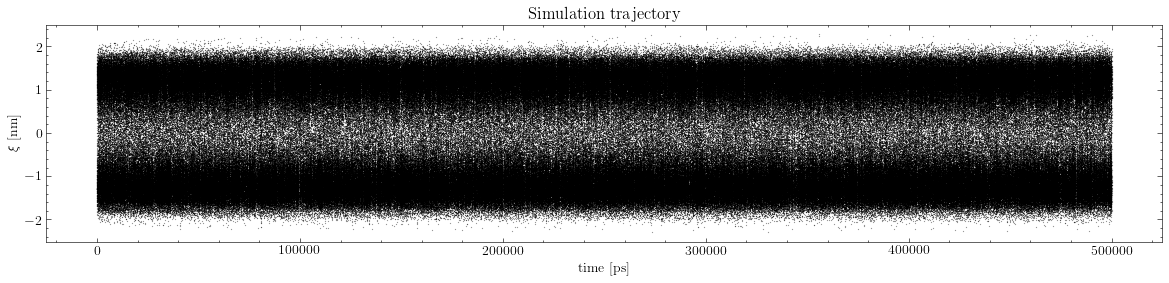

In [12]:
# Read the position and HILLS file
HILLS = load_HILLS_1D(hills_name="HILLS100M")
position = laod_position_1D(position_name="position100M")

#plot trajectory
plt.rcParams["figure.figsize"] = (20,4)
plt.scatter(HILLS[:,0], HILLS[:,1], color="black",marker=".", s=0.1)
plt.xlabel("time [ps]")
plt.ylabel(r"$\xi$ [nm]")
plt.title("Simulation trajectory")
plt.show()

plt.rcParams["figure.figsize"] = (5,4)

### On the fly error

The on the fly error is calculated as part of the mean force integration algorithm. As part of the calculation, following terms are continuously updated:

#Calculated anyways:
 - Ftot_den  (sum of probabiliy density)
 - Ftot (the average mean force)
 
#Additional calculations:
 - Ftot_den2  (sum of (probabiliy density squared))
 - ofe  (sum of (probability density of window * (mean force of window squared)))
 
At any point the user wants to (e.g. every 2% of the HILLS array) the error is computed without the need of any loops.


In [23]:
#Run MFI algorithm with on the fly error calculation
def MFI_1D_ofe():
    # initialise force terms
    Fbias = np.zeros(len(grid))
    Ftot_num = np.zeros(len(grid))
    Ftot_den = np.zeros(len(grid))
    Ftot_den2 = np.zeros(len(grid))
    ofv = np.zeros(len(grid))

    for i in range(total_number_of_hills):
        # Build metadynamics potential
        s = HILLS[i, 1]  # center position of gausian
        sigma_meta2 = HILLS[i, 2] ** 2  # width of gausian
        gamma = HILLS[i, 4]  # scaling factor of gausian
        height_meta = HILLS[i, 3] * ((gamma - 1) / (gamma))  # Height of Gausian
        kernelmeta = np.exp(-0.5 * (((grid - s) ** 2) / (sigma_meta2)))
        Fbias = Fbias + height_meta * kernelmeta * ((grid - s) / (sigma_meta2))  # Bias force due to Metadynamics potentials

        # Estimate the biased proabability density
        pb_t = np.zeros(len(grid))
        Fpbt = np.zeros(len(grid))
        data = position[i * stride: (i + 1) * stride]  # positons of window of constant bias force.
        for j in range(stride):
            kernel = const * np.exp(- (grid - data[j]) ** 2 / (2 * bw2))  # probability density of 1 datapoint
            pb_t = pb_t + kernel  # probability density of window
            Fpbt = Fpbt + kT * kernel * (grid - data[j]) / bw2

        # Estimate of the Mean Force and error  for terms
        Ftot_den = Ftot_den + pb_t  # total probability density
        dfds = np.divide(Fpbt, pb_t, out=np.zeros_like(Fpbt), where=pb_t != 0) + Fbias
        Ftot_num = Ftot_num + pb_t * dfds
        Ftot = np.divide(Ftot_num, Ftot_den, out=np.zeros_like(Ftot_num), where=Ftot_den != 0)  # total force
        #additional terms for error calculation
        Ftot_den2 = Ftot_den2 + pb_t ** 2 #sum of (probability densities)^2
        ofv = ofv + pb_t * (dfds ** 2)   #sum of (weighted mean force of window)^2

        #Calculate error
        if (i + 1) % int(total_number_of_hills / 50) == 0:
            #ofe 
            Ftot_den_ratio = np.divide(Ftot_den2, (Ftot_den ** 2 - Ftot_den2), out=np.zeros_like(Ftot_den), where=Ftot_den > 1E-10)
            ofe = np.divide(ofv, Ftot_den, out=np.zeros_like(ofv), where=Ftot_den > 1E-10) - Ftot ** 2
            ofe = ofe * Ftot_den_ratio
            ofe = np.sqrt(ofe)
            ofe_history.append(sum(ofe)/nbins)
            #AAD
            FES = intg_1D(Ftot)
            [AD, AAD] = absolute_error(FES)
            aad_history.append(AAD)
            print(str(round((i + 1) / total_number_of_hills * 100, 0)) + "%   OFE =", round(ofe_history[-1],4), "    AAD =", round(aad_history[-1],4))
                 
    return [Ftot_den, Ftot_den2, Ftot, ofv, ofe, FES]



In [27]:
#Define constants
bw = 0.02      # bw: bandwidth for the KDE of the biased probability density
bw2 = bw**2
kT = 1          # kT:       value of kT
stride = int(len(position) / len(HILLS[:,1]))     
const = (1 / (bw*np.sqrt(2*np.pi)*stride))
total_number_of_hills=len(HILLS[:,1])
print("total number of hills:", total_number_of_hills)

ofe_history = []
aad_history = []

[Ftot_den, Ftot_den2, Ftot, ofv, ofe, FES] = MFI_1D_ofe()




total number of hills: 1000000
2.0%   OFE = 1.1884     AAD = 0.0829
4.0%   OFE = 0.8397     AAD = 0.0391
6.0%   OFE = 0.6859     AAD = 0.0317
8.0%   OFE = 0.5926     AAD = 0.0286
10.0%   OFE = 0.5274     AAD = 0.0258
12.0%   OFE = 0.4791     AAD = 0.0299
14.0%   OFE = 0.4419     AAD = 0.0328
16.0%   OFE = 0.4137     AAD = 0.0261
18.0%   OFE = 0.3887     AAD = 0.0318
20.0%   OFE = 0.3678     AAD = 0.0316
22.0%   OFE = 0.3505     AAD = 0.0266
24.0%   OFE = 0.3357     AAD = 0.0278
26.0%   OFE = 0.3223     AAD = 0.0253
28.0%   OFE = 0.31     AAD = 0.024
30.0%   OFE = 0.2992     AAD = 0.0205
32.0%   OFE = 0.2896     AAD = 0.0189
34.0%   OFE = 0.2805     AAD = 0.0208
36.0%   OFE = 0.2727     AAD = 0.017
38.0%   OFE = 0.2652     AAD = 0.0159
40.0%   OFE = 0.2581     AAD = 0.0167
42.0%   OFE = 0.2517     AAD = 0.0178
44.0%   OFE = 0.2459     AAD = 0.0157
46.0%   OFE = 0.2405     AAD = 0.0129
48.0%   OFE = 0.2353     AAD = 0.013
50.0%   OFE = 0.2305     AAD = 0.0135
52.0%   OFE = 0.2259     AAD

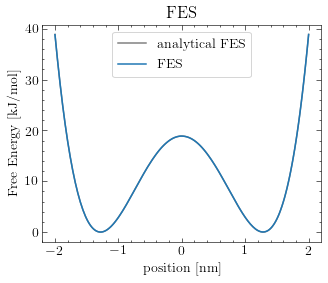

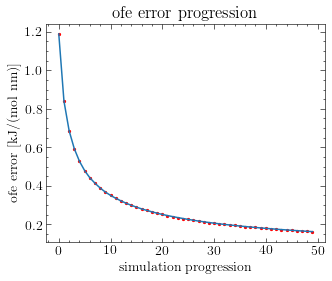

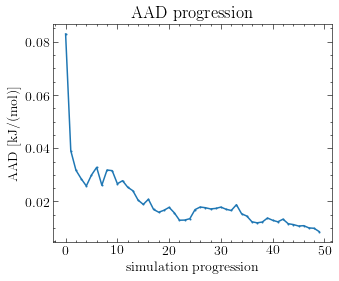

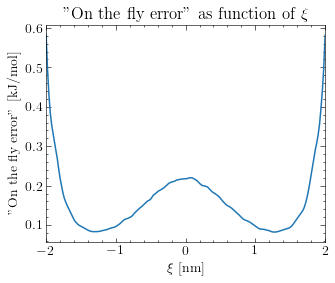

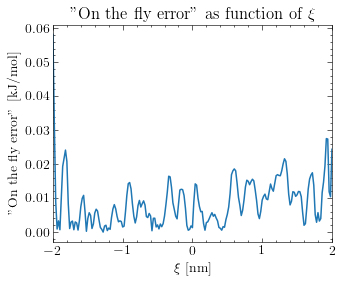

In [29]:
FES = intg_1D(Ftot)
[AD, AAD] = absolute_error(FES)

# #plot fes
plt.plot(grid, y , color="grey", label="analytical FES")
plt.plot(grid, FES, label="FES")
plt.title("FES")
plt.xlabel("position [nm]")
plt.ylabel("Free Energy [kJ/mol]")
plt.legend()
plt.show()

#Plot ofe error progression
plt.plot(range(len(ofe_history)), ofe_history)
plt.scatter(range(len(ofe_history)), ofe_history, s=5, c="r")
plt.ylabel("ofe error [kJ/(mol nm)]")
plt.xlabel("simulation progression")
plt.title("ofe error progression")
plt.show()

#Plot AAD progression
plt.plot(range(len(aad_history)), aad_history)
plt.scatter(range(len(aad_history)), aad_history, s=1)
plt.ylabel("AAD [kJ/(mol)]")
plt.xlabel("simulation progression")
plt.title("AAD progression")
plt.show()

#Plot final ofe as a function of the position
plt.plot(x, ofe)
plt.xlim(-2,2)
plt.xlabel("$\\xi$ [nm]")
plt.ylabel("\"On the fly error\" [kJ/mol]")
plt.title(" \"On the fly error\" as function of $\\xi$ ")
plt.show()

#Plot final ofe as a function of the position
plt.plot(x, AD)
plt.xlim(-2,2)
plt.xlabel("$\\xi$ [nm]")
plt.ylabel("\"On the fly error\" [kJ/mol]")
plt.title(" \"On the fly error\" as function of $\\xi$ ")
plt.show()


# On the fly Error in 2D

The on the fly error in 2 dimensions (or n dimensions) works simillar to the on the fly error in 1 dimension, with the main difference that now the error is calculated for each gradient separately.

This means that one will calculate the weighted variance of the x-gradient of the y-gradient. To find the overall varinece, the modulus of the two variances is calculated:

$\sigma_{xy} = \sqrt{ (\sigma_x)^2 + (\sigma_y)^2 } $

In [35]:
#Define Grid and theoretical function
nbins = 201
min_grid = -2
max_grid = 2
grid = np.linspace(min_grid, max_grid, nbins)
grid_space = (max_grid - min_grid) / (nbins - 1)
X, Y = np.meshgrid(grid, grid)
Z = 7*X**4 - 23*X**2 + 7*Y**4 - 23*Y**2
Z = Z - np.min(Z)

In [32]:
run_langevin2D(int(1E7), sigma=0.1, height=5, biasfactor=10)

os.system("mv HILLS HILLS2D_10M")
os.system("mv position position2D_10M")

0

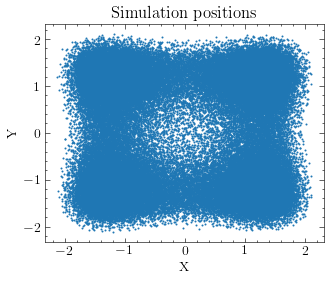

In [39]:
## import HILLS and position file
HILLS = load_HILLS_2D( hills_name="HILLS2D_10M")
[position_x, position_y] = laod_position_2D(position_name="position2D_10M")

plt.scatter(HILLS[:,1],HILLS[:,2],s=1)
plt.title("Simulation positions")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Total no. of HILLS for following simulation: 4000
1.0%   OFE = 83.7445     AAD = 11.364
red flag

2.0%   OFE = 64.0456     AAD = 8.249
red flag

4.0%   OFE = 50.6521     AAD = 8.0464
red flag

5.0%   OFE = 40.1525     AAD = 7.5718
red flag

6.0%   OFE = 35.2961     AAD = 8.2785
red flag

8.0%   OFE = 32.4574     AAD = 8.1853
9.0%   OFE = 30.0397     AAD = 7.5579
10.0%   OFE = 27.6533     AAD = 7.558
red flag

11.0%   OFE = 26.2992     AAD = 7.5684
red flag

12.0%   OFE = 24.866     AAD = 7.2885
red flag

14.0%   OFE = 23.2903     AAD = 7.0641
red flag

15.0%   OFE = 22.1183     AAD = 6.7897
red flag

16.0%   OFE = 21.2067     AAD = 6.8026
red flag

18.0%   OFE = 19.9503     AAD = 6.4665
red flag

19.0%   OFE = 19.278     AAD = 6.2023
20.0%   OFE = 18.5554     AAD = 5.9998
21.0%   OFE = 17.8991     AAD = 5.8801
22.0%   OFE = 17.3506     AAD = 5.9645
24.0%   OFE = 16.7618     AAD = 5.9083
25.0%   OFE = 16.4786     AAD = 5.8619
26.0%   OFE = 16.1083     AAD = 5.6918
28.0%   OFE = 15.3866 

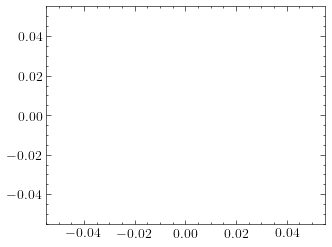

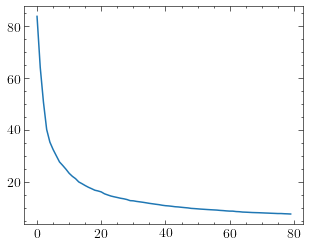

In [43]:
ad_history = []
ofe_history = []

stride = int(len(position_x)/len(HILLS))     # stride:   number of points in the COLVAR file per point in the HILLS file
const = (1 / (bw*np.sqrt(2*np.pi)*stride))

#Shorten HILLS
HILLS = HILLS[:4000]

#initialize terms
Fbias_x = np.zeros((nbins, nbins)) 
Fbias_y = np.zeros((nbins, nbins)) 
Ftot_num_x = np.zeros((nbins, nbins))
Ftot_num_y = np.zeros((nbins, nbins)) 
Ftot_den = np.zeros((nbins, nbins))
Ftot_den2 = np.zeros((nbins, nbins))
ofv_x = np.zeros((nbins,nbins))
ofv_y = np.zeros((nbins,nbins))

total_number_of_hills=len(HILLS[:,1]) 
print("Total no. of HILLS for following simulation: " + str(total_number_of_hills))


#Cycle over the updates of the bias potential V_t(s) ####################################################################################################################################################################
for i in range(total_number_of_hills):
    
    # Build metadynamics potential
    s_x = HILLS[i, 1]  # center x-position of gausian
    s_y = HILLS[i, 2]  # center y-position of gausian
    sigma_meta2_x = HILLS[i, 3] ** 2  # width of gausian
    sigma_meta2_y = HILLS[i, 4] ** 2  # width of gausian
    gamma = HILLS[i, 6]
    height_meta = HILLS[i, 5] * ((gamma - 1) / (gamma))  # Height of Gausian
    
    kernelmeta = np.exp(-0.5 * (((X - s_x) ** 2) / sigma_meta2_x + ((Y - s_y) ** 2) / sigma_meta2_y)) 
    Fbias_x = Fbias_x + height_meta * kernelmeta * ((X - s_x) / sigma_meta2_x)
    Fbias_y = Fbias_y + height_meta * kernelmeta * ((Y - s_y) / sigma_meta2_y) 


    # Initialise probability density
    pb_t = np.zeros((nbins, nbins))
    Fpbt_x = np.zeros((nbins, nbins))
    Fpbt_y = np.zeros((nbins, nbins))
    # Estimate the biased proabability density p_t ^ b(s)
    data_x = position_x[i * stride: (i + 1) * stride]
    data_y = position_y[i * stride: (i + 1) * stride]


    # Biased probability density component of the force
    for j in range(stride):
        kernel = const * np.exp(- (1 / (2 * bw2)) * ((X - data_x[j]) ** 2 + (Y - data_y[j]) ** 2))
        pb_t = pb_t + kernel
        Fpbt_x = Fpbt_x + kernel * kT * (X - data_x[j]) / bw2
        Fpbt_y = Fpbt_y + kernel * kT * (Y - data_y[j]) / bw2


    # Calculate Mean Force
    Ftot_den = Ftot_den + pb_t;
    # Calculate x-component of Force
    Fpbt_x = np.divide((Fpbt_x), pb_t, out=np.zeros_like(Fpbt_x), where=pb_t != 0)
    dfds_x = Fpbt_x + Fbias_x
    Ftot_num_x = Ftot_num_x + pb_t * dfds_x
    Ftot_x = np.divide(Ftot_num_x, Ftot_den, out=np.zeros_like(Fpbt_x), where=Ftot_den != 0)
    # Calculate y-component of Force
    Fpbt_y = np.divide((Fpbt_y), pb_t, out=np.zeros_like(Fpbt_y), where=pb_t != 0)
    dfds_y = Fpbt_y + Fbias_y
    Ftot_num_y = Ftot_num_y + pb_t * dfds_y
    Ftot_y = np.divide(Ftot_num_y, Ftot_den, out=np.zeros_like(Fpbt_y), where=Ftot_den != 0)

    #calculate on the fly error components
    Ftot_den2 = Ftot_den2 + pb_t**2   
    ofv_x += pb_t * dfds_x**2
    ofv_y += pb_t * dfds_y**2
    
    
    if (i + 1) % int(total_number_of_hills / 20) == 0:       
        #calculate ofe (standard error)
        Ftot_den_ratio = np.divide(Ftot_den2, (Ftot_den**2 - Ftot_den2), out=np.zeros_like(Ftot_den), where=(Ftot_den**2 - Ftot_den2) != 0)
        ofe_x = np.divide(ofv_x, Ftot_den, out=np.zeros_like(ofv_x), where=Ftot_den != 0) - Ftot_x**2
        ofe_y = np.divide(ofv_y, Ftot_den, out=np.zeros_like(ofv_y), where=Ftot_den != 0) - Ftot_y**2       
        ofe_x = ofe_x * Ftot_den_ratio
        ofe_y = ofe_y * Ftot_den_ratio
        ofe = np.sqrt(abs(ofe_x) + abs(ofe_y))                
        ofe_history.append(sum(sum(ofe)) / (nbins**2))
                           
        #integrate Ftot to find FES and absolute error
        FES = FFT_intg_2D(Ftot_x, Ftot_y)
        FES_error = abs(FES - Z)
        aad_history.append(sum(sum(FES_error)) / (nbins**2))
                
        print(str(round((i + 1) / total_number_of_hills * 100, 0)) + "%   OFE =", round(ofe_history[-1],4), "    AAD =", round(aad_history[-1],4))
        if np.min(ofe_x) < 0 or np.min(ofe_y) < 0:
            print("red flag\n")


plt.plot(range(len(ad_history)), ad_history)
plt.show()
         
plt.plot(range(len(ofe_history)), ofe_history)
plt.show()

